#  Submission : 13 Aug 2022

## Basic data cleaning and exploration:
Handle missing values in the data.

Analyze the structure of the data.

Try merging the rows using the hint mentioned above.

Build some features to prepare the data for actual analysis.

**Extract features from the below fields:**
Destination Name: Split and extract features out of destination. City-place-code (State)
Source Name: Split and extract features out of destination. City-place-code (State)
Trip_creation_time: Extract features like month, year and day etc


**In-depth analysis and feature engineering:**

-  Calculate the time taken between od_start_time and od_end_time and keep it as a feature. Drop the original columns, if required



-  Compare the difference between Point a. and start_scan_to_end_scan.



-  Do hypothesis testing/ Visual analysis to check.



-  Do hypothesis testing/ visual analysis between actual_time aggregated value and OSRM time aggregated value (aggregated values are the values you’ll get after merging the rows on the basis of trip_uuid)



-  Do hypothesis testing/ visual analysis between actual_time aggregated value and segment actual time aggregated value (aggregated values are the values you’ll get after merging the rows on the basis of trip_uuid)



-   Do hypothesis testing/ visual analysis between osrm distance aggregated value and segment osrm distance aggregated value (aggregated values are the values you’ll get after merging the rows on the basis of trip_uuid)



-  Do hypothesis testing/ visual analysis between osrm time aggregated value and segment osrm time aggregated value (aggregated values are the values you’ll get after merging the rows on the basis of trip_uuid)



-  Find outliers in the numerical variables (you might find outliers in almost all the variables), and check it using visual analysis



-  Handle the outliers using the IQR method.



-  Do one-hot encoding of categorical variables (like route_type)



-   Normalize/ Standardize the numerical features using MinMaxScaler or StandardScaler.


**Evaluation Criteria (100 Points):**

Define Problem Statement and perform Exploratory Data Analysis (10 points)

Definition of problem (as per given problem statement with additional views)

Observations on shape of data, data types of all the attributes, conversion of categorical attributes to 'category' (If required), missing value detection, statistical summary.

Visual Analysis (distribution plots of all the continuous variable(s), boxplots of all the categorical variables)

Insights based on EDA

Comments on range of attributes, outliers of various attributes

Comments on the distribution of the variables and relationship between them

Comments for each univariate and bivariate plot

Feature Creation (10 Points)

Merging of rows and aggregation of fields (10 Points)

Comparison & Visualization of time and distance fields (10 Points)

Missing values Treatment & Outlier treatment (10 Points)

Checking relationship between aggregated fields (10 Points)

Handling categorical values (10 Points)

Column Normalization /Column Standardization (10 Points)

**Business Insights (10 Points) - Should include patterns observed in the data along with what you can infer from it. Eg:**

Check from where most orders are coming from (State, Corridor etc)

Busiest corridor, avg distance between them, avg time taken

Recommendations (10 Points) - Actionable items for business. 

No technical jargon. No complications. Simple action items that everyone can understand.

# Business Case: Delhivery - Feature Engineering


- Evaluation will be kept lenient, so make sure you attempt this case study.


- It is understandable that you might struggle with getting started on this. Just brainstorm, discuss with peers, or get help from TAs.


- There is no right or wrong answer. We have to become comfortable with dealing with uncertainty in business. This is exactly the skill we want to develop.

# About Delhivery

Delhivery is the largest and fastest-growing fully integrated player in India by revenue in Fiscal 2021. They aim to build the operating system for commerce, through a combination of world-class infrastructure, logistics operations of the highest quality, and cutting-edge engineering and technology capabilities.

The Data team builds intelligence and capabilities using this data that helps them to widen the gap between the quality, efficiency, and profitability of their business versus their competitors.

# How can you help here?

The company wants to understand and process the data coming out of data engineering pipelines:

• Clean, sanitize and manipulate data to get useful features out of raw fields

• Make sense out of the raw data and help the data science team to build forecasting models on it

# Column Profiling:

data - tells whether the data is testing or training data

trip_creation_time – Timestamp of trip creation

route_schedule_uuid – Unique Id for a particular route schedule

route_type – Transportation type

FTL – Full Truck Load: FTL shipments get to the destination sooner, as the truck is making no other pickups or drop-offs along the way

Carting: Handling system consisting of small vehicles (carts)

trip_uuid - Unique ID given to a particular trip (A trip may include different source and destination centers)

source_center - Source ID of trip origin

source_name - Source Name of trip origin

destination_cente – Destination ID

destination_name – Destination Name

od_start_time – Trip start time

od_end_time – Trip end time

start_scan_to_end_scan – Time taken to deliver from source to destination

is_cutoff – Unknown field

cutoff_factor – Unknown field

cutoff_timestamp – Unknown field

actual_distance_to_destination – Distance in Kms between source and destination warehouse

actual_time – Actual time taken to complete the delivery (Cumulative)

osrm_time – An open-source routing engine time calculator which computes the shortest path between points in a given 
map (Includes usual traffic, distance through major and minor roads) and gives the time (Cumulative)

osrm_distance – An open-source routing engine which computes the shortest path between points in a given map (Includes usual traffic, distance through major and minor roads) (Cumulative)

factor – Unknown field

segment_actual_time – This is a segment time. Time taken by the subset of the package delivery

segment_osrm_time – This is the OSRM segment time. Time taken by the subset of the package delivery

segment_osrm_distance – This is the OSRM distance. Distance covered by subset of the package delivery

segment_factor – Unknown field

# Concept Used:

Feature Creation

Relationship between Features

Column Normalization /Column Standardization

Handling categorical values

Missing values - Outlier treatment / Types of outliers

# How to begin:

Since delivery details of one package are divided into several rows (think of it as connecting flights to reach a particular destination). Now think about how we should treat their fields if we combine these rows? What aggregation would make sense if we merge. What would happen to the numeric fields if we merge the rows?

**Hint**: You can use inbuilt functions like groupby and aggregations like sum(), cumsum() to merge some rows based on their 1. Trip_uuid, Source ID and Destination ID 2. Further aggregate on the basis of just Trip_uuid. You can also keep the first and last values for some numeric/categorical fields if aggregating them won’t make sense.

### Derived Column

- od_diff

In [1]:
import pandas as pd
import numpy as np 
from scipy import stats
from scipy.stats import norm
import matplotlib.pyplot as plt
import math
from statsmodels.stats.weightstats import ztest
import seaborn as sns 
import pandas as pd
import numpy as np 
from scipy import stats
from scipy.stats import norm
import matplotlib.pyplot as plt
import seaborn as sns
from numpy.random import seed
from numpy.random import randint
from numpy import mean
from sklearn.utils import resample
from sklearn.metrics import accuracy_score
import warnings
import datetime as dt 
from sorted_months_weekdays import *
from sort_dataframeby_monthorweek import *
warnings.filterwarnings("ignore")
import statsmodels.api as sm
from bioinfokit.analys import stat

In [2]:
df = pd.read_csv('delhivery_data.csv')
df_f = pd.read_csv('delhivery_data.csv')
df.head()

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,...,cutoff_timestamp,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor
0,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:27:55,10.435660,14.0,11.0,11.9653,1.272727,14.0,11.0,11.9653,1.272727
1,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:17:55,18.936842,24.0,20.0,21.7243,1.200000,10.0,9.0,9.7590,1.111111
2,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:01:19.505586,27.637279,40.0,28.0,32.5395,1.428571,16.0,7.0,10.8152,2.285714
3,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 03:39:57,36.118028,62.0,40.0,45.5620,1.550000,21.0,12.0,13.0224,1.750000
4,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 03:33:55,39.386040,68.0,44.0,54.2181,1.545455,6.0,5.0,3.9153,1.200000


In [3]:
#Converting Datatype.

# df1 = df1.rename(columns={'route_type':'route_type_prob'})

# t = len(df1['route_type_prob'])
# f = len(df1[df1['route_type_prob']=='FTL'])
# c = len(df1[df1['route_type_prob']=='Carting'])

# df1["route_type_prob"].replace(['Carting','FTL'],[round(c/t,2),round(f/t,2)],inplace=True)
# df1["is_cutoff"].replace([True,False],[1,0],inplace=True,inplace=True)

# df1.head(1)

In [4]:
#Converting Datatype Ends.

df['trip_creation_time'] = pd.to_datetime(df['trip_creation_time'])
df['od_start_time'] = pd.to_datetime(df['od_start_time'])
df['od_end_time'] = pd.to_datetime(df['od_end_time'])
df['cutoff_timestamp'] = pd.to_datetime(df['cutoff_timestamp'])



In [5]:
df.shape

(144867, 24)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144867 entries, 0 to 144866
Data columns (total 24 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   data                            144867 non-null  object        
 1   trip_creation_time              144867 non-null  datetime64[ns]
 2   route_schedule_uuid             144867 non-null  object        
 3   route_type                      144867 non-null  object        
 4   trip_uuid                       144867 non-null  object        
 5   source_center                   144867 non-null  object        
 6   source_name                     144574 non-null  object        
 7   destination_center              144867 non-null  object        
 8   destination_name                144606 non-null  object        
 9   od_start_time                   144867 non-null  datetime64[ns]
 10  od_end_time                     144867 non-null  datetim

In [7]:
df.isnull().mean()*100

data                              0.000000
trip_creation_time                0.000000
route_schedule_uuid               0.000000
route_type                        0.000000
trip_uuid                         0.000000
source_center                     0.000000
source_name                       0.202254
destination_center                0.000000
destination_name                  0.180165
od_start_time                     0.000000
od_end_time                       0.000000
start_scan_to_end_scan            0.000000
is_cutoff                         0.000000
cutoff_factor                     0.000000
cutoff_timestamp                  0.000000
actual_distance_to_destination    0.000000
actual_time                       0.000000
osrm_time                         0.000000
osrm_distance                     0.000000
factor                            0.000000
segment_actual_time               0.000000
segment_osrm_time                 0.000000
segment_osrm_distance             0.000000
segment_fac

In [8]:
df.columns

Index(['data', 'trip_creation_time', 'route_schedule_uuid', 'route_type',
       'trip_uuid', 'source_center', 'source_name', 'destination_center',
       'destination_name', 'od_start_time', 'od_end_time',
       'start_scan_to_end_scan', 'is_cutoff', 'cutoff_factor',
       'cutoff_timestamp', 'actual_distance_to_destination', 'actual_time',
       'osrm_time', 'osrm_distance', 'factor', 'segment_actual_time',
       'segment_osrm_time', 'segment_osrm_distance', 'segment_factor'],
      dtype='object')

In [9]:
len(df['route_schedule_uuid'].duplicated(keep=False))

144867

In [10]:
len(df['trip_uuid'].duplicated(keep=False))

144867

In [11]:
#Describe
df.describe()

,start_scan_to_end_scan,cutoff_factor,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor
count,144867.000000,144867.000000,144867.000000,144867.000000,144867.000000,144867.000000,144867.000000,144867.000000,144867.000000,144867.00000,144867.000000
mean,961.262986,232.926567,234.073372,416.927527,213.868272,284.771297,2.120107,36.196111,18.507548,22.82902,2.218368
std,1037.012769,344.755577,344.990009,598.103621,308.011085,421.119294,1.715421,53.571158,14.775960,17.86066,4.847530
min,20.000000,9.000000,9.000045,9.000000,6.000000,9.008200,0.144000,-244.000000,0.000000,0.00000,-23.444444
25%,161.000000,22.000000,23.355874,51.000000,27.000000,29.914700,1.604264,20.000000,11.000000,12.07010,1.347826
50%,449.000000,66.000000,66.126571,132.000000,64.000000,78.525800,1.857143,29.000000,17.000000,23.51300,1.684211
75%,1634.000000,286.000000,286.708875,513.000000,257.000000,343.193250,2.213483,40.000000,22.000000,27.81325,2.250000
max,7898.000000,1927.000000,1927.447705,4532.000000,1686.000000,2326.199100,77.387097,3051.000000,1611.000000,2191.40370,574.250000


In [12]:
#Describe Ends.
df.describe(include='object')

,data,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name
count,144867,144867,144867,144867,144867,144574,144867,144606
unique,2,1504,2,14817,1508,1498,1481,1468
top,training,thanos::sroute:4029a8a2-6c74-4b7e-a6d8-f9e069f...,FTL,trip-153793758186488532,IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana)
freq,104858,1812,99660,101,23347,23347,15192,15192


In [13]:
#Dropping Columns.

# df1 = df1.drop(['route_schedule_uuid'],axis=1)
# df1 = df0.drop(['route_schedule_uuid'],axis=1)

# df0 = df0.drop(['data'],axis=1)
# df1 = df1.drop(['data'],axis=1)

# df1 = df1.drop(['trip_uuid'],axis=1)
# df0 = df0.drop(['trip_uuid'],axis=1)

# df1 = df1.drop(['source_center'],axis=1)
# df0 = df0.drop(['source_center'],axis=1)

# df1 = df1.drop(['destination_center'],axis=1)
# df0 = df0.drop(['destination_center'],axis=1)


#df1 = df1.drop(['route_type_probb'],axis=1)





In [14]:
#Value Counts
for i in ['data', 'route_type', 'source_center', 'source_name', 'destination_center',
       'destination_name', 'is_cutoff']:
    
    print(df[i].value_counts(normalize=True)*100)
    print('-'*50)

training    72.382254
test        27.617746
Name: data, dtype: float64
--------------------------------------------------
FTL        68.794135
Carting    31.205865
Name: route_type, dtype: float64
--------------------------------------------------
IND000000ACB    16.116162
IND562132AAA     6.885626
IND421302AAG     6.273340
IND411033AAA     2.803261
IND501359AAE     2.305563
                  ...    
IND686632AAA     0.000690
IND335501AAA     0.000690
IND242001AAA     0.000690
IND221010AAA     0.000690
IND690537AAA     0.000690
Name: source_center, Length: 1508, dtype: float64
--------------------------------------------------
Gurgaon_Bilaspur_HB (Haryana)         16.148823
Bangalore_Nelmngla_H (Karnataka)       6.899581
Bhiwandi_Mankoli_HB (Maharashtra)      6.286054
Pune_Tathawde_H (Maharashtra)          2.808942
Hyderabad_Shamshbd_H (Telangana)       2.310236
                                        ...    
Chikhli_KKndrDPP_D (Maharashtra)       0.000692
Delhi_Palam (Delhi)          

In [15]:
#Value Counts Ends
for i in [ 'cutoff_factor', 'segment_actual_time',
       'segment_osrm_time', 'segment_factor']:
    
    print(df[i].value_counts(normalize=True)*100)
    print('-'*50)

22      9.082124
9       8.544389
44      5.752863
18      5.703852
66      4.000221
          ...   
368     0.000690
240     0.000690
310     0.000690
1461    0.000690
239     0.000690
Name: cutoff_factor, Length: 501, dtype: float64
--------------------------------------------------
24.0     4.271504
26.0     3.782090
30.0     3.384484
27.0     3.064190
23.0     3.037959
           ...   
479.0    0.000690
345.0    0.000690
736.0    0.000690
546.0    0.000690
718.0    0.000690
Name: segment_actual_time, Length: 747, dtype: float64
--------------------------------------------------
16.0     7.926581
17.0     7.493770
18.0     6.028978
19.0     4.780247
15.0     4.725714
           ...   
211.0    0.000690
254.0    0.000690
997.0    0.000690
370.0    0.000690
294.0    0.000690
Name: segment_osrm_time, Length: 214, dtype: float64
--------------------------------------------------
 2.000000     4.142420
 1.500000     3.200867
 1.000000     1.636674
 1.666667     1.635983
-1.000000     1

# Extara

In [16]:
# df1.hist(bins=20,figsize=(20,15),color='lightblue')
# plt.show()

In [17]:
# sns.satter(df1)

In [18]:
df.select_dtypes('number').columns

Index(['start_scan_to_end_scan', 'cutoff_factor',
       'actual_distance_to_destination', 'actual_time', 'osrm_time',
       'osrm_distance', 'factor', 'segment_actual_time', 'segment_osrm_time',
       'segment_osrm_distance', 'segment_factor'],
      dtype='object')

In [19]:
# x = df1[['start_scan_to_end_scan', 'cutoff_factor',
#        'actual_distance_to_destination', 'actual_time', 'osrm_time',
#        'osrm_distance', 'factor', 'segment_actual_time', 'segment_osrm_time',
#         'segment_osrm_distance', 'segment_factor']]

In [20]:
# plt.figure(figsize=(14,8))
cor = df.corr()
# sns.heatmap(cor)

In [21]:
df.head()

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,...,cutoff_timestamp,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor
0,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:27:55.000000,10.435660,14.0,11.0,11.9653,1.272727,14.0,11.0,11.9653,1.272727
1,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:17:55.000000,18.936842,24.0,20.0,21.7243,1.200000,10.0,9.0,9.7590,1.111111
2,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:01:19.505586,27.637279,40.0,28.0,32.5395,1.428571,16.0,7.0,10.8152,2.285714
3,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 03:39:57.000000,36.118028,62.0,40.0,45.5620,1.550000,21.0,12.0,13.0224,1.750000
4,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 03:33:55.000000,39.386040,68.0,44.0,54.2181,1.545455,6.0,5.0,3.9153,1.200000


**converting datatype**

In [22]:
df.head(1)

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,...,cutoff_timestamp,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor
0,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:27:55,10.43566,14.0,11.0,11.9653,1.272727,14.0,11.0,11.9653,1.272727


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144867 entries, 0 to 144866
Data columns (total 24 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   data                            144867 non-null  object        
 1   trip_creation_time              144867 non-null  datetime64[ns]
 2   route_schedule_uuid             144867 non-null  object        
 3   route_type                      144867 non-null  object        
 4   trip_uuid                       144867 non-null  object        
 5   source_center                   144867 non-null  object        
 6   source_name                     144574 non-null  object        
 7   destination_center              144867 non-null  object        
 8   destination_name                144606 non-null  object        
 9   od_start_time                   144867 non-null  datetime64[ns]
 10  od_end_time                     144867 non-null  datetim

In [24]:
# round(c/t,2)

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144867 entries, 0 to 144866
Data columns (total 24 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   data                            144867 non-null  object        
 1   trip_creation_time              144867 non-null  datetime64[ns]
 2   route_schedule_uuid             144867 non-null  object        
 3   route_type                      144867 non-null  object        
 4   trip_uuid                       144867 non-null  object        
 5   source_center                   144867 non-null  object        
 6   source_name                     144574 non-null  object        
 7   destination_center              144867 non-null  object        
 8   destination_name                144606 non-null  object        
 9   od_start_time                   144867 non-null  datetime64[ns]
 10  od_end_time                     144867 non-null  datetim

In [26]:
df["source_city"] = df["source_name"].str.extract(r'([^_]+)')
df["source_state"] = df["source_name"].str.extract(r'.*\((.*)\).*')
df["source_code"] = (df["source_name"].str.split("_",n=2,expand = True)[2]).str.split(" ",n = 1, expand = True)[0]
df["source_place"] = df["source_name"].str.split("_",n=2,expand = True)[1]
df["destination_city"] = df["destination_name"].str.extract(r'([^_]+)')
df["destination_state"] = df["destination_name"].str.extract(r'.*\((.*)\).*')
df["destination_code"] = (df["destination_name"].str.split("_",n=2,expand = True)[2]).str.split(" ",n = 1, expand = True)[0]
df["destination_place"] = df["destination_name"].str.split("_",n=2,expand = True)[1]

df["source_city"].replace({"Bangalore":"Bengaluru"},inplace=True)
df["destination_city"].replace({"Bangalore":"Bengaluru"},inplace=True)

#   *Hypothesis Testing.*

---------------------------------------------------------------------------------------------------------------------------

## ----------------------------------------------3.1,3.2 Starts---------------------------------------

In [27]:
pd.set_option('display.max_columns', None)


df['od_diff'] = (df['od_end_time'] - df['od_start_time'])/(pd.Timedelta(1,unit='hour'))

df['start_scan_to_end_scan'] = df['start_scan_to_end_scan']/60

df

# Derived feature od_diff from od_end_time - od_start_time

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,od_end_time,start_scan_to_end_scan,is_cutoff,cutoff_factor,cutoff_timestamp,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor,source_city,source_state,source_code,source_place,destination_city,destination_state,destination_code,destination_place,od_diff
0,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,1.433333,True,9,2018-09-20 04:27:55.000000,10.435660,14.0,11.0,11.9653,1.272727,14.0,11.0,11.9653,1.272727,Anand,Gujarat,DC,VUNagar,Khambhat,Gujarat,D,MotvdDPP,1.436894
1,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,1.433333,True,18,2018-09-20 04:17:55.000000,18.936842,24.0,20.0,21.7243,1.200000,10.0,9.0,9.7590,1.111111,Anand,Gujarat,DC,VUNagar,Khambhat,Gujarat,D,MotvdDPP,1.436894
2,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,1.433333,True,27,2018-09-20 04:01:19.505586,27.637279,40.0,28.0,32.5395,1.428571,16.0,7.0,10.8152,2.285714,Anand,Gujarat,DC,VUNagar,Khambhat,Gujarat,D,MotvdDPP,1.436894
3,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,1.433333,True,36,2018-09-20 03:39:57.000000,36.118028,62.0,40.0,45.5620,1.550000,21.0,12.0,13.0224,1.750000,Anand,Gujarat,DC,VUNagar,Khambhat,Gujarat,D,MotvdDPP,1.436894
4,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,1.433333,False,39,2018-09-20 03:33:55.000000,39.386040,68.0,44.0,54.2181,1.545455,6.0,5.0,3.9153,1.200000,Anand,Gujarat,DC,VUNagar,Khambhat,Gujarat,D,MotvdDPP,1.436894
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144862,training,2018-09-20 16:24:28.436231,thanos::sroute:f0569d2f-4e20-4c31-8542-67b86d5...,Carting,trip-153746066843555182,IND131028AAB,Sonipat_Kundli_H (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-20 16:24:28.436231,2018-09-20 23:32:09.618069,7.116667,True,45,2018-09-20 21:57:20.000000,45.258278,94.0,60.0,67.9280,1.566667,12.0,12.0,8.1858,1.000000,Sonipat,Haryana,H,Kundli,Gurgaon,Haryana,HB,Bilaspur,7.128106
144863,training,2018-09-20 16:24:28.436231,thanos::sroute:f0569d2f-4e20-4c31-8542-67b86d5...,Carting,trip-153746066843555182,IND131028AAB,Sonipat_Kundli_H (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-20 16:24:28.436231,2018-09-20 23:32:09.618069,7.116667,True,54,2018-09-20 21:31:18.000000,54.092531,120.0,76.0,85.6829,1.578947,26.0,21.0,17.3725,1.238095,Sonipat,Haryana,H,Kundli,Gurgaon,Haryana,HB,Bilaspur,7.128106
144864,training,2018-09-20 16:24:28.436231,thanos::sroute:f0569d2f-4e20-4c31-8542-67b86d5...,Carting,trip-153746066843555182,IND131028AAB,Sonipat_Kundli_H (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-20 16:24:28.436231,2018-09-20 23:32:09.618069,7.116667,True,63,2018-09-20 21:11:18.000000,66.163591,140.0,88.0,97.0933,1.590909,20.0,34.0,20.7053,0.588235,Sonip

In [28]:
h1_od_sc = pd.DataFrame(df.groupby('trip_uuid')['start_scan_to_end_scan'].unique().apply(sum).reset_index())
h1_od_sc

,trip_uuid,start_scan_to_end_scan
0,trip-153671041653548748,37.650000
1,trip-153671042288605164,3.000000
2,trip-153671043369099517,65.550000
3,trip-153671046011330457,1.666667
4,trip-153671052974046625,11.950000
...,...,...
14812,trip-153861095625827784,4.283333
14813,trip-153861104386292051,1.000000
14814,trip-153861106442901555,7.016667
14815,trip-153861115439069069,5.783333


In [29]:
h1_od_sc1 = pd.DataFrame(df.groupby('trip_uuid')['od_diff'].unique().apply(sum).reset_index())
h1_od_sc1

,trip_uuid,od_diff
0,trip-153671041653548748,37.668497
1,trip-153671042288605164,3.026865
2,trip-153671043369099517,65.572709
3,trip-153671046011330457,1.674916
4,trip-153671052974046625,11.972484
...,...,...
14812,trip-153861095625827784,4.300482
14813,trip-153861104386292051,1.009842
14814,trip-153861106442901555,7.035331
14815,trip-153861115439069069,5.808548


In [30]:
a1 = h1_od_sc.start_scan_to_end_scan
a2 = h1_od_sc1.od_diff

a1_log = np.log(a1)
a2_log = np.log(a2)


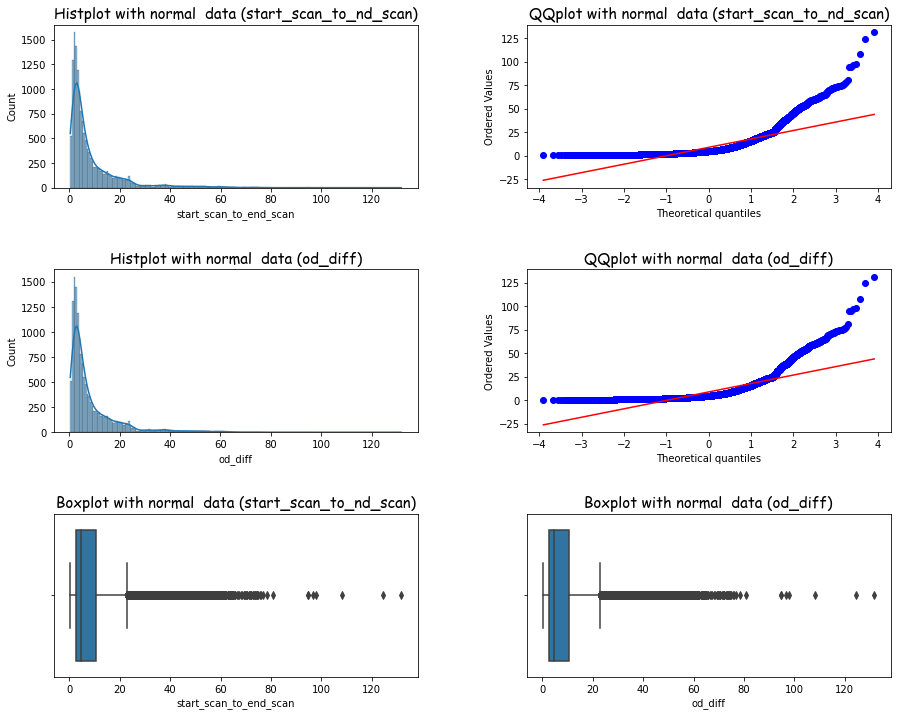

In [31]:
fig = plt.figure(figsize=(15, 12))
ax = fig.add_subplot(321)
sns.histplot(a1, bins=200, kde=True)
plt.title('Histplot with normal  data (start_scan_to_nd_scan)',
          fontsize=15,
          fontname='Comic Sans MS')
ax = fig.add_subplot(322)
stats.probplot(a1, dist='norm', plot=plt)
plt.title('QQplot with normal  data (start_scan_to_nd_scan)',
          fontsize=15,
          fontname='Comic Sans MS')
ax = fig.add_subplot(323)
sns.histplot(a2, bins=200, kde=True)
plt.title('Histplot with normal  data (od_diff)',
          fontsize=15,
          fontname='Comic Sans MS')
ax = fig.add_subplot(324)
stats.probplot(a2, dist='norm', plot=plt)
plt.title('QQplot with normal  data (od_diff)',
          fontsize=15,
          fontname='Comic Sans MS')
ax = fig.add_subplot(325)
sns.boxplot(a1)
plt.title('Boxplot with normal  data (start_scan_to_nd_scan)',
          fontsize=15,
          fontname='Comic Sans MS')
ax = fig.add_subplot(326)
sns.boxplot(a2)
plt.title('Boxplot with normal  data (od_diff)',
          fontsize=15,
          fontname='Comic Sans MS')
plt.subplots_adjust(wspace=0.3, hspace=.5)
plt.show()

In [32]:
for i in range(7):
    print(stats.ttest_ind(a1.sample(10000) ,a2.sample(10000)),'\n')


Ttest_indResult(statistic=0.38477810300367243, pvalue=0.70040591548849) 

Ttest_indResult(statistic=-0.9015758967484958, pvalue=0.36729305758808917) 

Ttest_indResult(statistic=0.022155570915902548, pvalue=0.9823240791996724) 

Ttest_indResult(statistic=0.13432204968569633, pvalue=0.8931492698283353) 

Ttest_indResult(statistic=-0.4808117734033931, pvalue=0.6306555418499371) 

Ttest_indResult(statistic=-0.6015981138198314, pvalue=0.5474485043161663) 

Ttest_indResult(statistic=0.15930500069284503, pvalue=0.8734301898585808) 



**CONCLUSION**  : As p value > alpha **we failed to reject null hypothesis** ie start_scan_to_end_scan = od_diff.

---------------------------------------------------------------------------------------------------------------------------

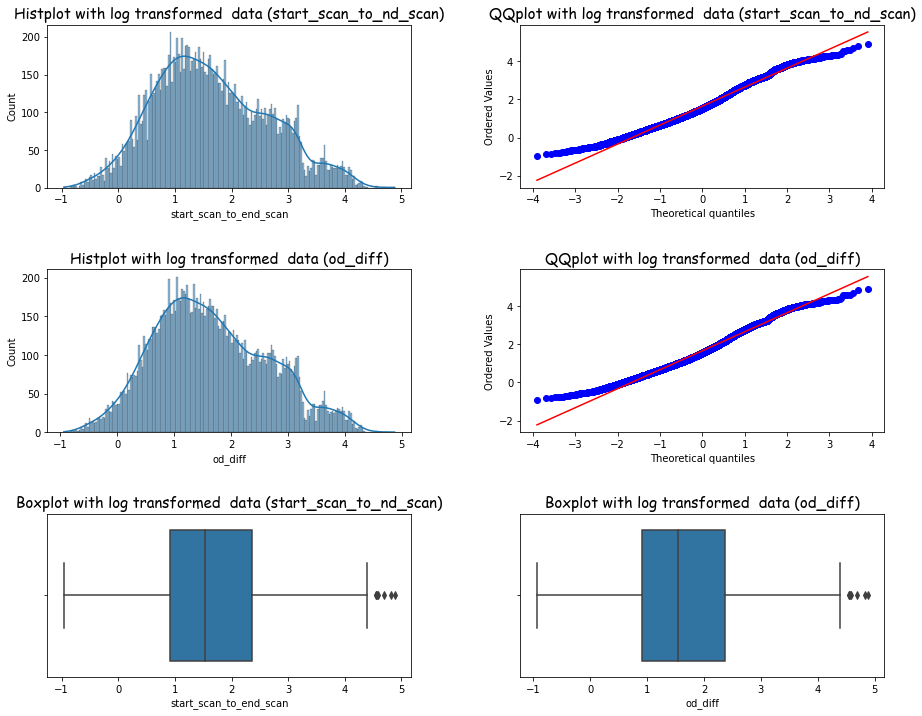

In [33]:
fig = plt.figure(figsize=(15, 12))
ax = fig.add_subplot(321)
sns.histplot(a1_log, bins=200, kde=True)
plt.title('Histplot with log transformed  data (start_scan_to_nd_scan)',
          fontsize=15,
          fontname='Comic Sans MS')
ax = fig.add_subplot(322)
stats.probplot(a1_log, dist='norm', plot=plt)
plt.title('QQplot with log transformed  data (start_scan_to_nd_scan)',
          fontsize=15,
          fontname='Comic Sans MS')
ax = fig.add_subplot(323)
sns.histplot(a2_log, bins=200, kde=True)
plt.title('Histplot with log transformed  data (od_diff)',
          fontsize=15,
          fontname='Comic Sans MS')
ax = fig.add_subplot(324)
stats.probplot(a2_log, dist='norm', plot=plt)
plt.title('QQplot with log transformed  data (od_diff)',
          fontsize=15,
          fontname='Comic Sans MS')
ax = fig.add_subplot(325)
sns.boxplot(a1_log)
plt.title('Boxplot with log transformed  data (start_scan_to_nd_scan)',
          fontsize=15,
          fontname='Comic Sans MS')
ax = fig.add_subplot(326)
sns.boxplot(a2_log)
plt.title('Boxplot with log transformed  data (od_diff)',
          fontsize=15,
          fontname='Comic Sans MS')
plt.subplots_adjust(wspace=0.3, hspace=.5)
plt.show()

In [34]:
for i in range(7):
    print(stats.ttest_ind(a1_log.sample(10000) ,a2_log.sample(10000)),'\n')


Ttest_indResult(statistic=-0.14374185733838227, pvalue=0.8857057653581609) 

Ttest_indResult(statistic=0.15820444237270126, pvalue=0.8742973007210773) 

Ttest_indResult(statistic=-1.6580247429733135, pvalue=0.0973281562802183) 

Ttest_indResult(statistic=-0.3435389774457936, pvalue=0.7311966347035347) 

Ttest_indResult(statistic=0.5172238829014342, pvalue=0.6050056024040293) 

Ttest_indResult(statistic=-1.1970509744677147, pvalue=0.23130087668113355) 

Ttest_indResult(statistic=-0.0621115423252852, pvalue=0.9504746260234233) 



**CONCLUSION**  : As p value > alpha **we failed to reject the null hypothesis** ie start_scan_to_end_scan = od_diff.




---------------------------------------------------------------------------------------------------------------------------------------

## --------------------------------------------------------3.1,3.2 Ends------------------------------------------------

# ----------------------------------------------3.3 Starts---------------------------------------

In [35]:
df.head()

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,od_end_time,start_scan_to_end_scan,is_cutoff,cutoff_factor,cutoff_timestamp,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor,source_city,source_state,source_code,source_place,destination_city,destination_state,destination_code,destination_place,od_diff
0,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,1.433333,True,9,2018-09-20 04:27:55.000000,10.435660,14.0,11.0,11.9653,1.272727,14.0,11.0,11.9653,1.272727,Anand,Gujarat,DC,VUNagar,Khambhat,Gujarat,D,MotvdDPP,1.436894
1,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,1.433333,True,18,2018-09-20 04:17:55.000000,18.936842,24.0,20.0,21.7243,1.200000,10.0,9.0,9.7590,1.111111,Anand,Gujarat,DC,VUNagar,Khambhat,Gujarat,D,MotvdDPP,1.436894
2,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,1.433333,True,27,2018-09-20 04:01:19.505586,27.637279,40.0,28.0,32.5395,1.428571,16.0,7.0,10.8152,2.285714,Anand,Gujarat,DC,VUNagar,Khambhat,Gujarat,D,MotvdDPP,1.436894
3,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,1.433333,True,36,2018-09-20 03:39:57.000000,36.118028,62.0,40.0,45.5620,1.550000,21.0,12.0,13.0224,1.750000,Anand,Gujarat,DC,VUNagar,Khambhat,Gujarat,D,MotvdDPP,1.436894
4,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,1.433333,False,39,2018-09-20 03:33:55.000000,39.386040,68.0,44.0,54.2181,1.545455,6.0,5.0,3.9153,1.200000,Anand,Gujarat,DC,VUNagar,Khambhat,Gujarat,D,MotvdDPP,1.436894


In [36]:
agg_act_clm = pd.DataFrame(df.groupby(['trip_uuid','od_diff'])['actual_time'].max().reset_index())
agg_act_clm.head(3)

,trip_uuid,od_diff,actual_time
0,trip-153671041653548748,16.658423,830.0
1,trip-153671041653548748,21.010074,732.0
2,trip-153671042288605164,0.980540,47.0


In [37]:
agg_osrm_clm = pd.DataFrame(df.groupby(['trip_uuid','od_diff'])['osrm_time'].max().reset_index())
agg_osrm_clm.head(3)



,trip_uuid,od_diff,osrm_time
0,trip-153671041653548748,16.658423,394.0
1,trip-153671041653548748,21.010074,349.0
2,trip-153671042288605164,0.980540,26.0


In [38]:
agg_act_clm1 = pd.DataFrame(agg_act_clm.groupby('trip_uuid')['actual_time'].sum().reset_index())
agg_act_clm1.head(3)

,trip_uuid,actual_time
0,trip-153671041653548748,1562.0
1,trip-153671042288605164,143.0
2,trip-153671043369099517,3347.0


In [39]:
agg_orsm_clm1 = pd.DataFrame(agg_osrm_clm.groupby('trip_uuid')['osrm_time'].sum().reset_index())
agg_orsm_clm1.head(3)





,trip_uuid,osrm_time
0,trip-153671041653548748,743.0
1,trip-153671042288605164,68.0
2,trip-153671043369099517,1741.0


In [40]:
a31 = agg_act_clm1.actual_time
a32 = agg_orsm_clm1.osrm_time


a31_log = np.log(a31)
a32_log = np.log(a32)


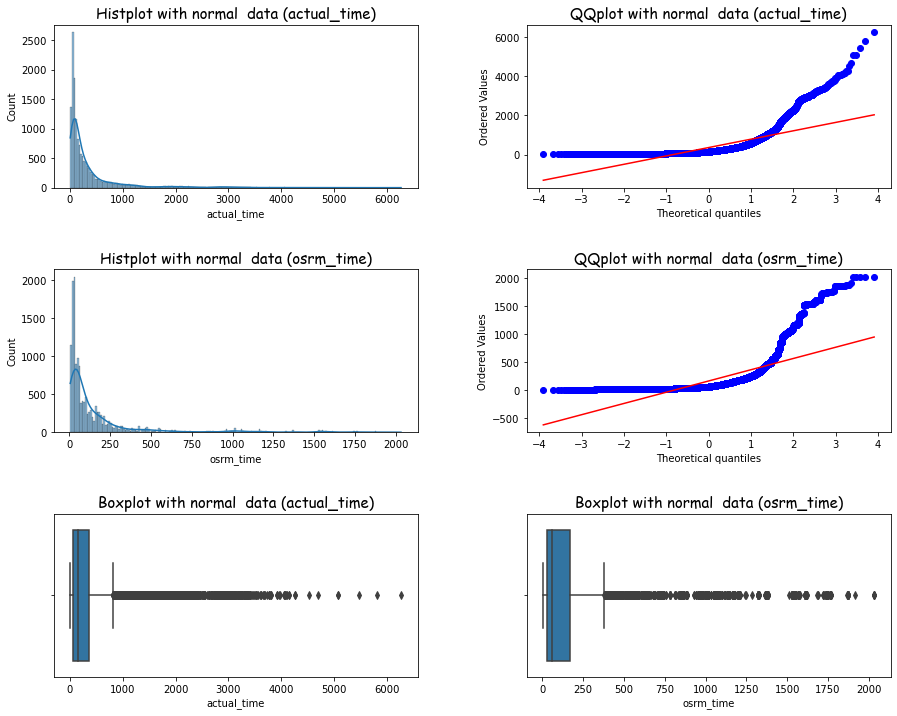

In [41]:
fig = plt.figure(figsize=(15, 12))
ax = fig.add_subplot(321)
sns.histplot(a31, bins=200, kde=True)
plt.title('Histplot with normal  data (actual_time)',
          fontsize=15,
          fontname='Comic Sans MS')
ax = fig.add_subplot(322)
stats.probplot(a31, dist='norm', plot=plt)
plt.title('QQplot with normal  data (actual_time)',
          fontsize=15,
          fontname='Comic Sans MS')
ax = fig.add_subplot(323)
sns.histplot(a32, bins=200, kde=True)
plt.title('Histplot with normal  data (osrm_time)',
          fontsize=15,
          fontname='Comic Sans MS')
ax = fig.add_subplot(324)
stats.probplot(a32, dist='norm', plot=plt)
plt.title('QQplot with normal  data (osrm_time)',
          fontsize=15,
          fontname='Comic Sans MS')
ax = fig.add_subplot(325)
sns.boxplot(a31)
plt.title('Boxplot with normal  data (actual_time)',
          fontsize=15,
          fontname='Comic Sans MS')
ax = fig.add_subplot(326)
sns.boxplot(a32)
plt.title('Boxplot with normal  data (osrm_time)',
          fontsize=15,
          fontname='Comic Sans MS')
plt.subplots_adjust(wspace=0.3, hspace=.5)
plt.show()

In [42]:
for i in range(7):
    print(stats.ttest_ind(a31.sample(5000) ,a32.sample(5000)),'\n')


Ttest_indResult(statistic=21.21426486137007, pvalue=9.851614184388565e-98) 

Ttest_indResult(statistic=21.489001336190036, pvalue=3.561958320257163e-100) 

Ttest_indResult(statistic=22.77385787889205, pvalue=5.694470738445837e-112) 

Ttest_indResult(statistic=21.717916782615813, pvalue=3.1286367693275287e-102) 

Ttest_indResult(statistic=21.89775558555797, pvalue=7.345748669267984e-104) 

Ttest_indResult(statistic=23.295627060544504, pvalue=6.159190994895717e-117) 

Ttest_indResult(statistic=21.92730901879637, pvalue=3.9547821855707494e-104) 



**CONCLUSION** : As p value < alpha **we failed to accept null hypothesis** ie actual_time != osrm_time.

---------------------------------------------------------------------------------------------------------------------------

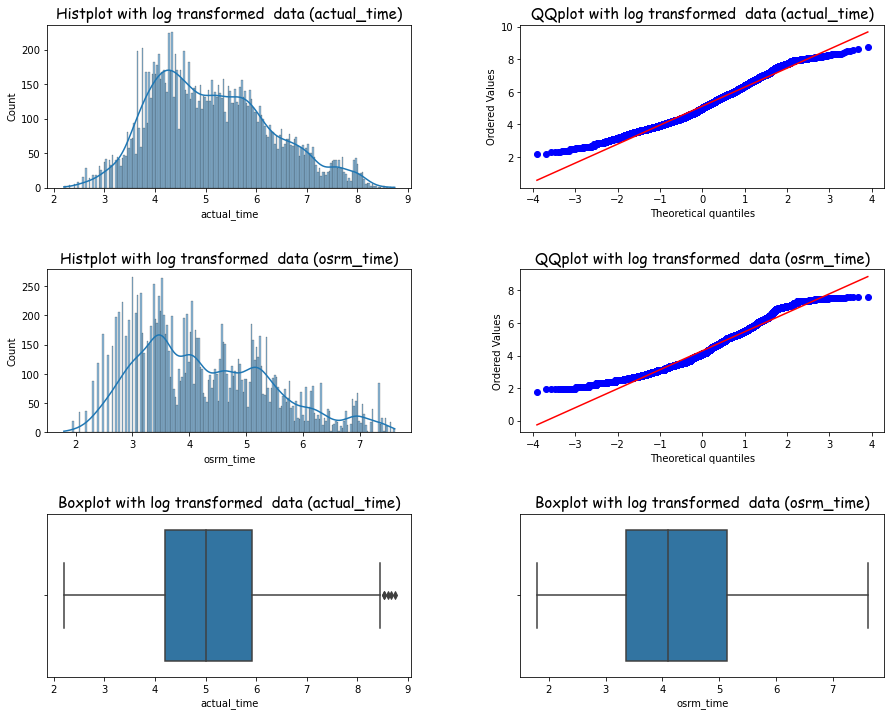

In [43]:
fig = plt.figure(figsize=(15, 12))
ax = fig.add_subplot(321)
sns.histplot(a31_log, bins=200, kde=True)
plt.title('Histplot with log transformed  data (actual_time)',
          fontsize=15,
          fontname='Comic Sans MS')
ax = fig.add_subplot(322)
stats.probplot(a31_log, dist='norm', plot=plt)
plt.title('QQplot with log transformed  data (actual_time)',
          fontsize=15,
          fontname='Comic Sans MS')
ax = fig.add_subplot(323)
sns.histplot(a32_log, bins=200, kde=True)
plt.title('Histplot with log transformed  data (osrm_time)',
          fontsize=15,
          fontname='Comic Sans MS')
ax = fig.add_subplot(324)
stats.probplot(a32_log, dist='norm', plot=plt)
plt.title('QQplot with log transformed  data (osrm_time)',
          fontsize=15,
          fontname='Comic Sans MS')
ax = fig.add_subplot(325)
sns.boxplot(a31_log)
plt.title('Boxplot with log transformed  data (actual_time)',
          fontsize=15,
          fontname='Comic Sans MS')
ax = fig.add_subplot(326)
sns.boxplot(a32_log)
plt.title('Boxplot with log transformed  data (osrm_time)',
          fontsize=15,
          fontname='Comic Sans MS')
plt.subplots_adjust(wspace=0.3, hspace=.5)
plt.show()

In [44]:
for i in range(7):
    print(stats.ttest_ind(a31_log.sample(5000) ,a32_log.sample(5000)),'\n')


Ttest_indResult(statistic=35.119090190135815, pvalue=6.879751015467334e-255) 

Ttest_indResult(statistic=34.44156595326825, pvalue=9.42738036836539e-246) 

Ttest_indResult(statistic=35.69330785092346, pvalue=9.672554377011688e-263) 

Ttest_indResult(statistic=35.200467277675024, pvalue=5.380370698917478e-256) 

Ttest_indResult(statistic=36.94007341639897, pvalue=3.9851880139176687e-280) 

Ttest_indResult(statistic=35.926609456340614, pvalue=5.8504233326070556e-266) 

Ttest_indResult(statistic=34.683021335778484, pvalue=5.422561519798231e-249) 



**CONCLUSION** : As p value < alpha **we failed to accept null hypothesis** ie actual_time != osrm_time.




---------------------------------------------------------------------------------------------------------------------------------------

## --------------------------------------------------------------3.3 Ends------------------------------------------------------

# --------------------------------------------3.4 Starts----------------------------------------------------

In [45]:
pd.set_option('display.max_columns', None)
df.head()

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,od_end_time,start_scan_to_end_scan,is_cutoff,cutoff_factor,cutoff_timestamp,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor,source_city,source_state,source_code,source_place,destination_city,destination_state,destination_code,destination_place,od_diff
0,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,1.433333,True,9,2018-09-20 04:27:55.000000,10.435660,14.0,11.0,11.9653,1.272727,14.0,11.0,11.9653,1.272727,Anand,Gujarat,DC,VUNagar,Khambhat,Gujarat,D,MotvdDPP,1.436894
1,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,1.433333,True,18,2018-09-20 04:17:55.000000,18.936842,24.0,20.0,21.7243,1.200000,10.0,9.0,9.7590,1.111111,Anand,Gujarat,DC,VUNagar,Khambhat,Gujarat,D,MotvdDPP,1.436894
2,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,1.433333,True,27,2018-09-20 04:01:19.505586,27.637279,40.0,28.0,32.5395,1.428571,16.0,7.0,10.8152,2.285714,Anand,Gujarat,DC,VUNagar,Khambhat,Gujarat,D,MotvdDPP,1.436894
3,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,1.433333,True,36,2018-09-20 03:39:57.000000,36.118028,62.0,40.0,45.5620,1.550000,21.0,12.0,13.0224,1.750000,Anand,Gujarat,DC,VUNagar,Khambhat,Gujarat,D,MotvdDPP,1.436894
4,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,1.433333,False,39,2018-09-20 03:33:55.000000,39.386040,68.0,44.0,54.2181,1.545455,6.0,5.0,3.9153,1.200000,Anand,Gujarat,DC,VUNagar,Khambhat,Gujarat,D,MotvdDPP,1.436894


In [46]:
# agg_seg_act = pd.DataFrame(df.groupby(['trip_uuid','od_diff'])['segment_actual_time'].max().reset_index())
# agg_seg_act1 = pd.DataFrame(agg_seg_act.groupby('trip_uuid')['segment_actual_time'].sum().reset_index())
# agg_seg_act1.head()



#agg_seg_actt = pd.DataFrame(df.groupby(['trip_uuid'])['segment_actual_time'].unique().reset_index())
agg_seg_act1 = pd.DataFrame(df.groupby(['trip_uuid'])['segment_actual_time'].sum().reset_index())
agg_seg_act1.head(3)

,trip_uuid,segment_actual_time
0,trip-153671041653548748,1548.0
1,trip-153671042288605164,141.0
2,trip-153671043369099517,3308.0


In [47]:
a31 = agg_act_clm1.actual_time
a41 = agg_seg_act1.segment_actual_time


a31_log = np.log(a31)
a41_log = np.log(a41)

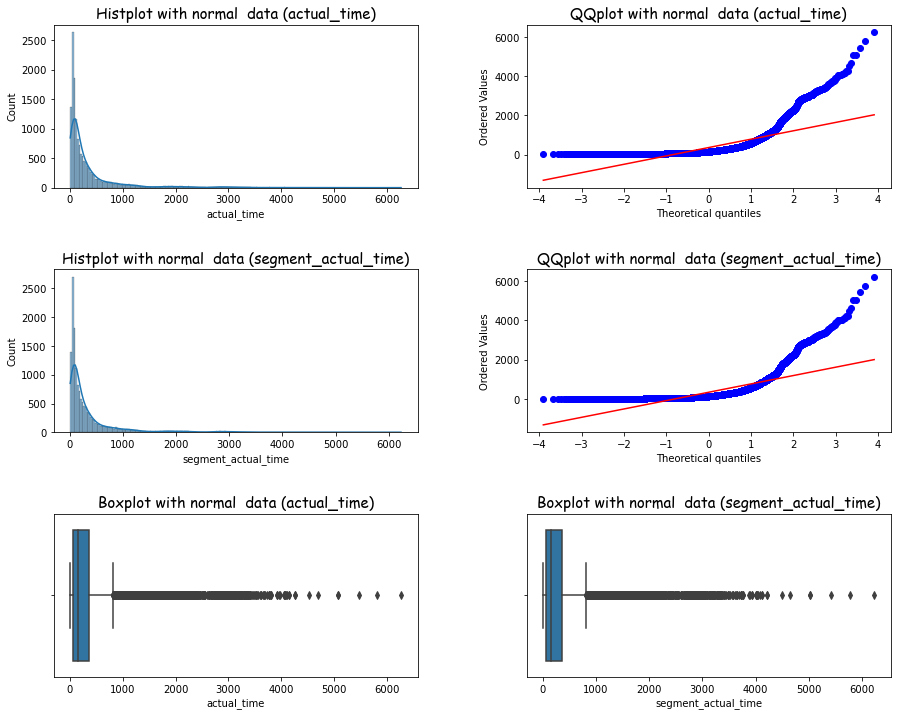

In [48]:
fig = plt.figure(figsize=(15, 12))
ax = fig.add_subplot(321)
sns.histplot(a31, bins=200, kde=True)
plt.title('Histplot with normal  data (actual_time)',
          fontsize=15,
          fontname='Comic Sans MS')
ax = fig.add_subplot(322)
stats.probplot(a31, dist='norm', plot=plt)
plt.title('QQplot with normal  data (actual_time)',
          fontsize=15,
          fontname='Comic Sans MS')
ax = fig.add_subplot(323)
sns.histplot(a41, bins=200, kde=True)
plt.title('Histplot with normal  data (segment_actual_time)',
          fontsize=15,
          fontname='Comic Sans MS')
ax = fig.add_subplot(324)
stats.probplot(a41, dist='norm', plot=plt)
plt.title('QQplot with normal  data (segment_actual_time)',
          fontsize=15,
          fontname='Comic Sans MS')
ax = fig.add_subplot(325)
sns.boxplot(a31)
plt.title('Boxplot with normal  data (actual_time)',
          fontsize=15,
          fontname='Comic Sans MS')
ax = fig.add_subplot(326)
sns.boxplot(a41)
plt.title('Boxplot with normal  data (segment_actual_time)',
          fontsize=15,
          fontname='Comic Sans MS')
plt.subplots_adjust(wspace=0.3, hspace=.5)
plt.show()

In [49]:
for i in range(7):
    print(stats.ttest_ind(a31.sample(10000) ,a41.sample(10000)),'\n')


Ttest_indResult(statistic=-0.24827362217950627, pvalue=0.8039252558946408) 

Ttest_indResult(statistic=1.1442827820105106, pvalue=0.25252007733449533) 

Ttest_indResult(statistic=-0.9800682295963339, pvalue=0.3270642964487479) 

Ttest_indResult(statistic=1.1048686104831649, pvalue=0.26922981832340037) 

Ttest_indResult(statistic=0.5063670594172888, pvalue=0.6126045768946786) 

Ttest_indResult(statistic=0.19762473045273893, pvalue=0.8433406928786304) 

Ttest_indResult(statistic=0.5270313754887077, pvalue=0.5981776464326245) 



**CONCLUSION**: As p value < alpha **we failed to reject null hypothesis** ie actual_time = segment_actual_time.

---------------------------------------------------------------------------------------------------------------------------

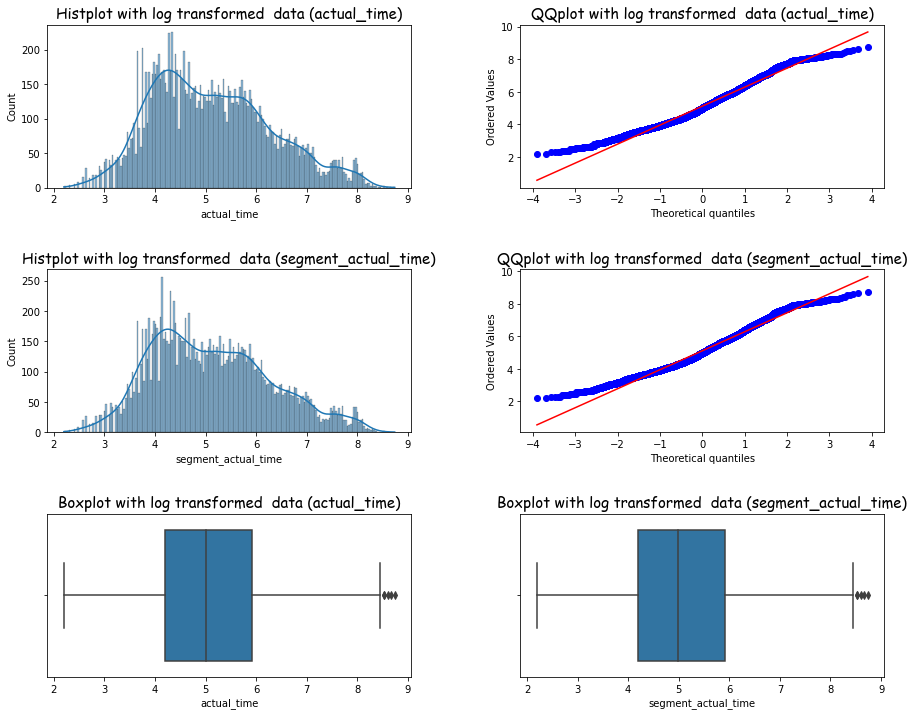

In [50]:
fig = plt.figure(figsize=(15, 12))
ax = fig.add_subplot(321)
sns.histplot(a31_log, bins=200, kde=True)
plt.title('Histplot with log transformed  data (actual_time)',
          fontsize=15,
          fontname='Comic Sans MS')
ax = fig.add_subplot(322)
stats.probplot(a31_log, dist='norm', plot=plt)
plt.title('QQplot with log transformed  data (actual_time)',
          fontsize=15,
          fontname='Comic Sans MS')
ax = fig.add_subplot(323)
sns.histplot(a41_log, bins=200, kde=True)
plt.title('Histplot with log transformed  data (segment_actual_time)',
          fontsize=15,
          fontname='Comic Sans MS')
ax = fig.add_subplot(324)
stats.probplot(a41_log, dist='norm', plot=plt)
plt.title('QQplot with log transformed  data (segment_actual_time)',
          fontsize=15,
          fontname='Comic Sans MS')
ax = fig.add_subplot(325)
sns.boxplot(a31_log)
plt.title('Boxplot with log transformed  data (actual_time)',
          fontsize=15,
          fontname='Comic Sans MS')
ax = fig.add_subplot(326)
sns.boxplot(a41_log)
plt.title('Boxplot with log transformed  data (segment_actual_time)',
          fontsize=15,
          fontname='Comic Sans MS')
plt.subplots_adjust(wspace=0.3, hspace=.5)
plt.show()

In [51]:
for i in range(7):
    print(stats.ttest_ind(a31_log.sample(10000) ,a41_log.sample(10000)),'\n')


Ttest_indResult(statistic=0.41865570952444164, pvalue=0.6754722649441793) 

Ttest_indResult(statistic=-0.3394833564427309, pvalue=0.7342491980435355) 

Ttest_indResult(statistic=0.15061931709560542, pvalue=0.8802775415028669) 

Ttest_indResult(statistic=0.7825027551907854, pvalue=0.4339284321456589) 

Ttest_indResult(statistic=1.8839102027508285, pvalue=0.05959161747430222) 

Ttest_indResult(statistic=0.6840428452537554, pvalue=0.49395603733165505) 

Ttest_indResult(statistic=0.7209710955195563, pvalue=0.4709357265889025) 



**CONCLUSION**: As p value > alpha **we failed to reject the null hypothesis** ie actual_time = segment_actual_time.




---------------------------------------------------------------------------------------------------------------------------

## ------------------------------------------------------------3.4 Ends-----------------------------------------------------------

# --------------------------------------------3.5 Starts----------------------------------------------------

In [52]:
pd.set_option('display.max_columns', None)
df.head(3)


,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,od_end_time,start_scan_to_end_scan,is_cutoff,cutoff_factor,cutoff_timestamp,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor,source_city,source_state,source_code,source_place,destination_city,destination_state,destination_code,destination_place,od_diff
0,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,1.433333,True,9,2018-09-20 04:27:55.000000,10.435660,14.0,11.0,11.9653,1.272727,14.0,11.0,11.9653,1.272727,Anand,Gujarat,DC,VUNagar,Khambhat,Gujarat,D,MotvdDPP,1.436894
1,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,1.433333,True,18,2018-09-20 04:17:55.000000,18.936842,24.0,20.0,21.7243,1.200000,10.0,9.0,9.7590,1.111111,Anand,Gujarat,DC,VUNagar,Khambhat,Gujarat,D,MotvdDPP,1.436894
2,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,1.433333,True,27,2018-09-20 04:01:19.505586,27.637279,40.0,28.0,32.5395,1.428571,16.0,7.0,10.8152,2.285714,Anand,Gujarat,DC,VUNagar,Khambhat,Gujarat,D,MotvdDPP,1.436894


In [53]:
agg_osrm_dist = pd.DataFrame(df.groupby(['trip_uuid','od_diff'])['osrm_distance'].max().reset_index())
agg_osrm_dist1 = pd.DataFrame(agg_osrm_dist.groupby('trip_uuid')['osrm_distance'].sum().reset_index())
print(agg_osrm_dist1.head(),'\n')

# agg_segosrm_d = pd.DataFrame(df.groupby(['trip_uuid','od_diff'])['segment_osrm_distance'].max().reset_index())
# agg_segosrm_d1 = pd.DataFrame(agg_segosrm_d.groupby('trip_uuid')['segment_osrm_distance'].sum().reset_index())
# agg_segosrm_d1.head()

                 trip_uuid  osrm_distance
0  trip-153671041653548748       991.3523
1  trip-153671042288605164        85.1110
2  trip-153671043369099517      2372.0852
3  trip-153671046011330457        19.6800
4  trip-153671052974046625       146.7918 



In [54]:
agg_segosrm_d = pd.DataFrame(df.groupby(['trip_uuid'])['segment_osrm_distance'].sum().reset_index())
# agg_segosrm_d1 = pd.DataFrame(agg_segosrm_d.groupby('trip_uuid')['segment_osrm_distance'].sum().reset_index())
# agg_segosrm_d1.head()
agg_segosrm_d.head(3)



,trip_uuid,segment_osrm_distance
0,trip-153671041653548748,1320.4733
1,trip-153671042288605164,84.1894
2,trip-153671043369099517,2545.2678


In [55]:
a51 = agg_osrm_dist1.osrm_distance
a52 = agg_segosrm_d.segment_osrm_distance


a51_log = np.log(agg_osrm_dist1.osrm_distance)
a52_log = np.log(agg_segosrm_d.segment_osrm_distance)

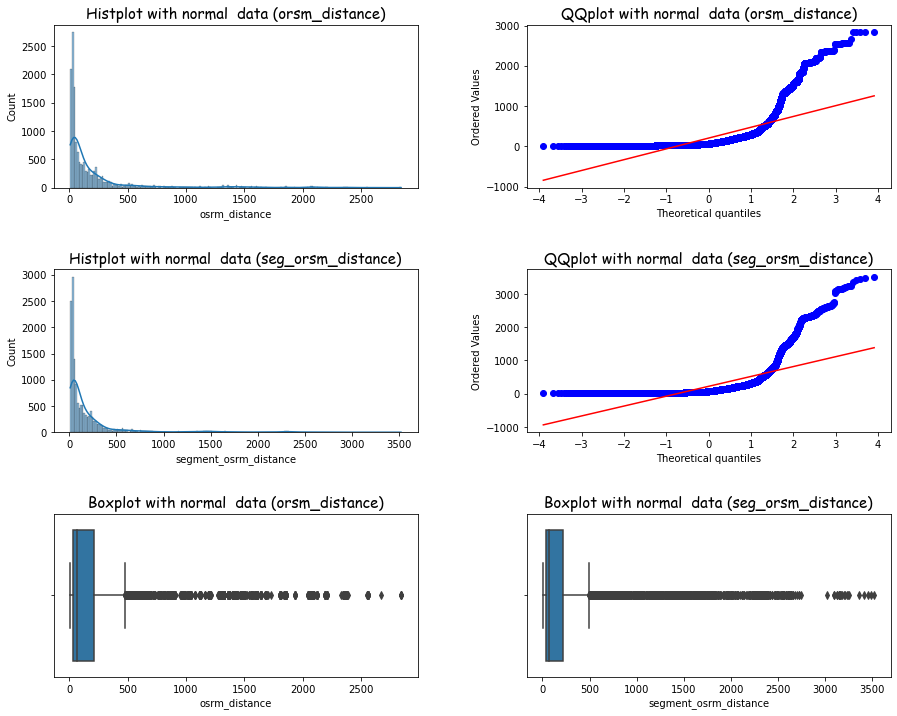

In [56]:
fig = plt.figure(figsize=(15, 12))
ax = fig.add_subplot(321)
sns.histplot(a51, bins=200, kde=True)
plt.title('Histplot with normal  data (orsm_distance)',
          fontsize=15,
          fontname='Comic Sans MS')
ax = fig.add_subplot(322)
stats.probplot(a51, dist='norm', plot=plt)
plt.title('QQplot with normal  data (orsm_distance)',
          fontsize=15,
          fontname='Comic Sans MS')
ax = fig.add_subplot(323)
sns.histplot(a52, bins=200, kde=True)
plt.title('Histplot with normal  data (seg_orsm_distance)',
          fontsize=15,
          fontname='Comic Sans MS')
ax = fig.add_subplot(324)
stats.probplot(a52, dist='norm', plot=plt)
plt.title('QQplot with normal  data (seg_orsm_distance)',
          fontsize=15,
          fontname='Comic Sans MS')
ax = fig.add_subplot(325)
sns.boxplot(a51)
plt.title('Boxplot with normal  data (orsm_distance)',
          fontsize=15,
          fontname='Comic Sans MS')
ax = fig.add_subplot(326)
sns.boxplot(a52)
plt.title('Boxplot with normal  data (seg_orsm_distance)',
          fontsize=15,
          fontname='Comic Sans MS')
plt.subplots_adjust(wspace=0.3, hspace=.5)
plt.show()

In [57]:
for i in range(7):
    print(stats.ttest_ind(a51.sample(10000) ,a52.sample(10000)),'\n')

Ttest_indResult(statistic=-1.862672529422159, pvalue=0.06252300500007393) 

Ttest_indResult(statistic=-2.604628362569295, pvalue=0.009204200236164941) 

Ttest_indResult(statistic=-3.3730753935571167, pvalue=0.0007447458554864437) 

Ttest_indResult(statistic=-3.004687498548828, pvalue=0.0026618316331609476) 

Ttest_indResult(statistic=-3.381894018418855, pvalue=0.0007212578328863348) 

Ttest_indResult(statistic=-4.196772826732609, pvalue=2.7191399976849138e-05) 

Ttest_indResult(statistic=-2.9348243933938623, pvalue=0.0033411594002756124) 



**CONCLUSION**:As p value < alpha **we failed to accept the null hypothesis** ie osrm_distance != segment_osrm_distance

---------------------------------------------------------------------------------------------------------------------------

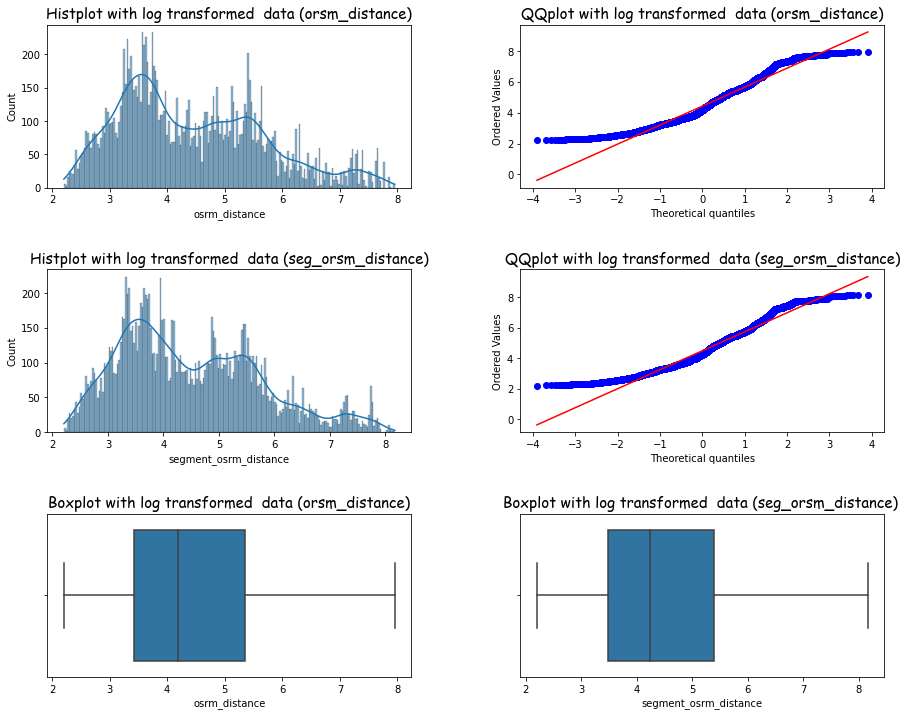

In [58]:
fig = plt.figure(figsize=(15, 12))
ax = fig.add_subplot(321)
sns.histplot(a51_log, bins=200, kde=True)
plt.title('Histplot with log transformed  data (orsm_distance)',
          fontsize=15,
          fontname='Comic Sans MS')
ax = fig.add_subplot(322)
stats.probplot(a51_log, dist='norm', plot=plt)
plt.title('QQplot with log transformed  data (orsm_distance)',
          fontsize=15,
          fontname='Comic Sans MS')
ax = fig.add_subplot(323)
sns.histplot(a52_log, bins=200, kde=True)
plt.title('Histplot with log transformed  data (seg_orsm_distance)',
          fontsize=15,
          fontname='Comic Sans MS')
ax = fig.add_subplot(324)
stats.probplot(a52_log, dist='norm', plot=plt)
plt.title('QQplot with log transformed  data (seg_orsm_distance)',
          fontsize=15,
          fontname='Comic Sans MS')
ax = fig.add_subplot(325)
sns.boxplot(a51_log)
plt.title('Boxplot with log transformed  data (orsm_distance)',
          fontsize=15,
          fontname='Comic Sans MS')
ax = fig.add_subplot(326)
sns.boxplot(a52_log)
plt.title('Boxplot with log transformed  data (seg_orsm_distance) ',
          fontsize=15,
          fontname='Comic Sans MS')
plt.subplots_adjust(wspace=0.3, hspace=.5)
plt.show()

In [59]:
for i in range(7):
    print(stats.ttest_ind(a51_log.sample(10000) ,a52_log.sample(10000)),'\n')

Ttest_indResult(statistic=-4.081797532509003, pvalue=4.48622856017506e-05) 

Ttest_indResult(statistic=-4.017030327274107, pvalue=5.9151560331628485e-05) 

Ttest_indResult(statistic=-3.2999620957101876, pvalue=0.0009686697993491703) 

Ttest_indResult(statistic=-3.962197727977674, pvalue=7.452066146543682e-05) 

Ttest_indResult(statistic=-3.8177628266272525, pvalue=0.00013507335995608364) 

Ttest_indResult(statistic=-2.3344689799050182, pvalue=0.01958102455523571) 

Ttest_indResult(statistic=-2.7502731043901814, pvalue=0.005959913577065141) 



**CONCLUSION** : As p value < alpha **we failed to accept the null hypothesis** ie osrm_distance != segment_osrm_distance.






--------------------------------------------------------------------------------------------------------------------------------------

## ----------------------------------------------------------3.5 Ends-------------------------------------------------------------

# --------------------------------------------3.6 Starts----------------------------------------------------

In [60]:
pd.set_option('display.max_columns', None)
df.head(3)


,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,od_end_time,start_scan_to_end_scan,is_cutoff,cutoff_factor,cutoff_timestamp,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor,source_city,source_state,source_code,source_place,destination_city,destination_state,destination_code,destination_place,od_diff
0,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,1.433333,True,9,2018-09-20 04:27:55.000000,10.435660,14.0,11.0,11.9653,1.272727,14.0,11.0,11.9653,1.272727,Anand,Gujarat,DC,VUNagar,Khambhat,Gujarat,D,MotvdDPP,1.436894
1,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,1.433333,True,18,2018-09-20 04:17:55.000000,18.936842,24.0,20.0,21.7243,1.200000,10.0,9.0,9.7590,1.111111,Anand,Gujarat,DC,VUNagar,Khambhat,Gujarat,D,MotvdDPP,1.436894
2,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,1.433333,True,27,2018-09-20 04:01:19.505586,27.637279,40.0,28.0,32.5395,1.428571,16.0,7.0,10.8152,2.285714,Anand,Gujarat,DC,VUNagar,Khambhat,Gujarat,D,MotvdDPP,1.436894


In [61]:
agg_segosrm_t = pd.DataFrame(df.groupby(['trip_uuid'])['segment_osrm_time'].sum().reset_index())
agg_segosrm_t.head(3)


,trip_uuid,segment_osrm_time
0,trip-153671041653548748,1008.0
1,trip-153671042288605164,65.0
2,trip-153671043369099517,1941.0


In [62]:
a32 = a32
a61 = agg_segosrm_t.segment_osrm_time



a32_log = np.log(a32)
a61_log = np.log(a61)

# agg_segosrm_t = pd.DataFrame(df.groupby(['trip_uuid','od_diff'])['segment_osrm_time'].max().reset_index())
# agg_segosrm_t1 = pd.DataFrame(agg_segosrm_t.groupby('trip_uuid')['segment_osrm_time'].sum().reset_index())
# agg_segosrm_t1.head()


# agg_segosrm_t = pd.DataFrame(df.groupby(['trip_uuid','od_diff'])['segment_osrm_time'].max().reset_index())
# agg_segosrm_t1 = pd.DataFrame(agg_segosrm_t.groupby('trip_uuid')['segment_osrm_time'].sum().reset_index())
# agg_segosrm_t1.head()

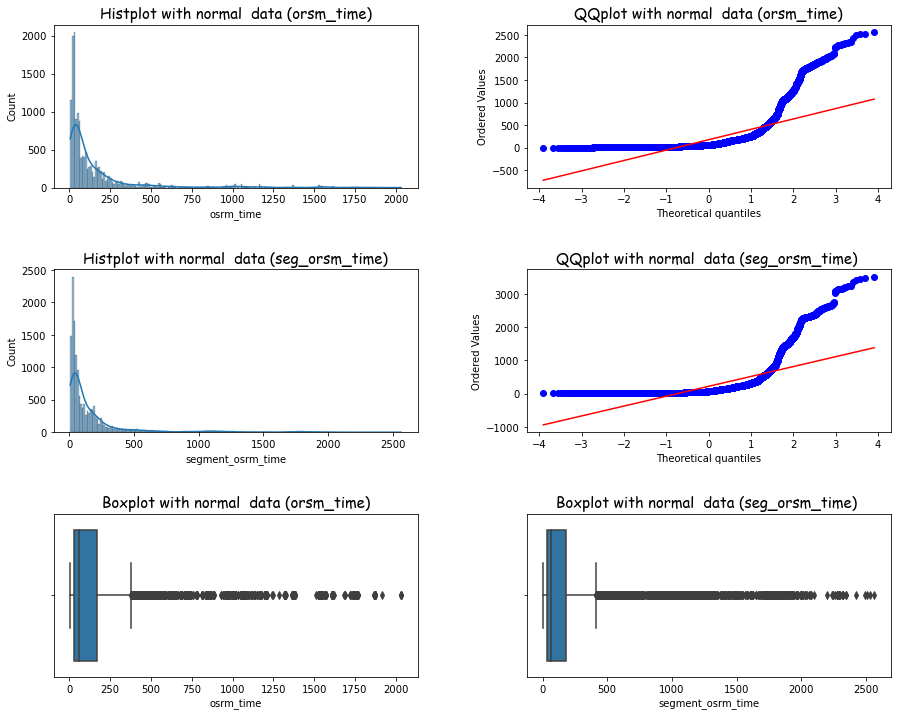

In [63]:
fig = plt.figure(figsize=(15, 12))
ax = fig.add_subplot(321)
sns.histplot(a32, bins=200, kde=True)
plt.title('Histplot with normal  data (orsm_time)',
          fontsize=15,
          fontname='Comic Sans MS')
ax = fig.add_subplot(322)
stats.probplot(a61, dist='norm', plot=plt)
plt.title('QQplot with normal  data (orsm_time)',
          fontsize=15,
          fontname='Comic Sans MS')
ax = fig.add_subplot(323)
sns.histplot(a61, bins=200, kde=True)
plt.title('Histplot with normal  data (seg_orsm_time)',
          fontsize=15,
          fontname='Comic Sans MS')
ax = fig.add_subplot(324)
stats.probplot(a52, dist='norm', plot=plt)
plt.title('QQplot with normal  data (seg_orsm_time) ',
          fontsize=15,
          fontname='Comic Sans MS')
ax = fig.add_subplot(325)
sns.boxplot(a32)
plt.title('Boxplot with normal  data (orsm_time)',
          fontsize=15,
          fontname='Comic Sans MS')
ax = fig.add_subplot(326)
sns.boxplot(a61)
plt.title('Boxplot with normal  data (seg_orsm_time) ',
          fontsize=15,
          fontname='Comic Sans MS')
plt.subplots_adjust(wspace=0.3, hspace=.5)
plt.show()

In [64]:
for i in range(7):
    print(stats.ttest_ind(a32.sample(7000) ,a61.sample(7000)),'\n')

Ttest_indResult(statistic=-4.035813284064382, pvalue=5.470285252199223e-05) 

Ttest_indResult(statistic=-3.791942439279223, pvalue=0.00015010147431664806) 

Ttest_indResult(statistic=-4.2584341959353225, pvalue=2.072069275759177e-05) 

Ttest_indResult(statistic=-4.190031223853832, pvalue=2.8062680655773447e-05) 

Ttest_indResult(statistic=-3.099916898603084, pvalue=0.0019395902769025798) 

Ttest_indResult(statistic=-3.3375423573042573, pvalue=0.0008474309443975506) 

Ttest_indResult(statistic=-4.225081307505949, pvalue=2.4036682484435433e-05) 



**CONCLUSION**:As p value < alpha **we failed to accept the null hypothesis** ie osrm_distance != segment_osrm_distance.




---------------------------------------------------------------------------------------------------------------------------

## Log Transformed

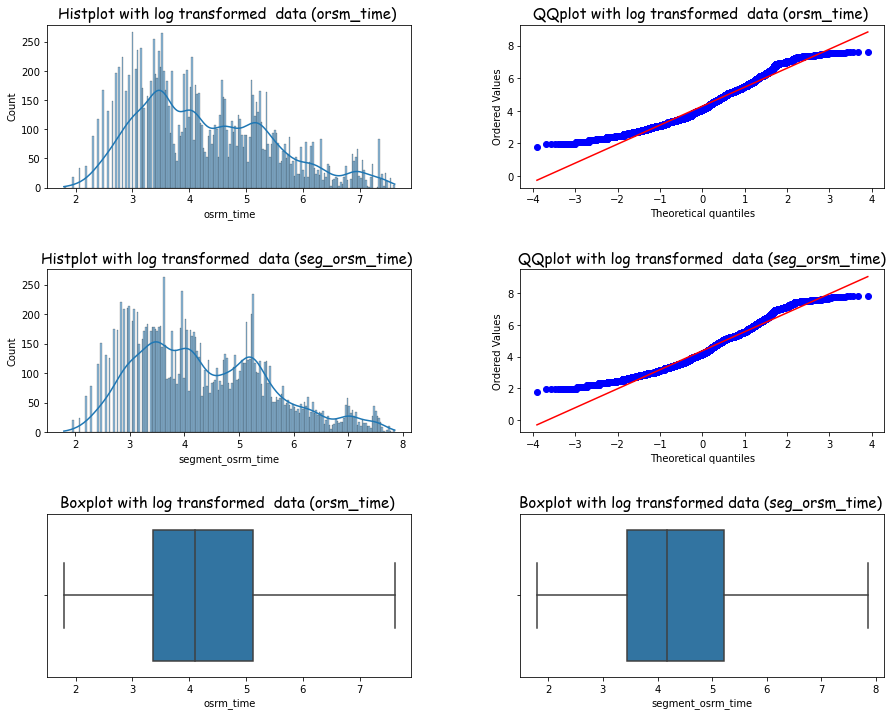

In [65]:
fig = plt.figure(figsize=(15, 12))
ax = fig.add_subplot(321)
sns.histplot(a32_log, bins=200, kde=True)
plt.title('Histplot with log transformed  data (orsm_time) ',
          fontsize=15,
          fontname='Comic Sans MS')
ax = fig.add_subplot(322)
stats.probplot(a32_log, dist='norm', plot=plt)
plt.title('QQplot with log transformed  data (orsm_time) ',
          fontsize=15,
          fontname='Comic Sans MS')
ax = fig.add_subplot(323)
sns.histplot(a61_log, bins=200, kde=True)
plt.title('Histplot with log transformed  data (seg_orsm_time) ',
          fontsize=15,
          fontname='Comic Sans MS')
ax = fig.add_subplot(324)
stats.probplot(a61_log, dist='norm', plot=plt)
plt.title('QQplot with log transformed  data (seg_orsm_time)',
          fontsize=15,
          fontname='Comic Sans MS')
ax = fig.add_subplot(325)
sns.boxplot(a32_log)
plt.title('Boxplot with log transformed  data (orsm_time) ',
          fontsize=15,
          fontname='Comic Sans MS')
ax = fig.add_subplot(326)
sns.boxplot(a61_log)
plt.title('Boxplot with log transformed data (seg_orsm_time) ',
          fontsize=15,
          fontname='Comic Sans MS')
plt.subplots_adjust(wspace=0.3, hspace=.5)
plt.show()

In [66]:
for i in range(7):
    print(stats.ttest_ind(a32_log.sample(7000) ,a61_log.sample(7000)),'\n')

Ttest_indResult(statistic=-3.9075022336372784, pvalue=9.369395938047536e-05) 

Ttest_indResult(statistic=-4.257768600832359, pvalue=2.0782383459174964e-05) 

Ttest_indResult(statistic=-3.6995886775737725, pvalue=0.00021677591771458585) 

Ttest_indResult(statistic=-3.8323405851774317, pvalue=0.00012748480648095415) 

Ttest_indResult(statistic=-3.4981226178584213, pvalue=0.0004699999879124574) 

Ttest_indResult(statistic=-3.035688590461469, pvalue=0.0024042809184365503) 

Ttest_indResult(statistic=-2.956234710023206, pvalue=0.0031193946477643454) 



**CONCLUSION**:As p value < alpha **we failed to accept the null hypothesis** ie osrm_distance != segment_osrm_distance.

# *Hypothesis Testing Ends.*

---------------------------------------------------------------------------------------------------------------------------------------

### ----------------------------------------------------------------3.6 Ends------------------------------------------------------------------------

# Extra


In [67]:
a = df.groupby("trip_uuid")[["source_state","destination_state"]].aggregate({"source_state":set,"destination_state":set})


In [68]:
b = ((df.groupby(["trip_uuid","is_cutoff"])["actual_distance_to_destination"].max()).reset_index()).groupby('trip_uuid')['actual_distance_to_destination'].sum()


In [69]:
c = a.merge(b ,on = 'trip_uuid')
df_c = pd.DataFrame(c)
df_c.reset_index()
df_c.head(3)
# h


,source_state,destination_state,actual_distance_to_destination
trip_uuid,,,
trip-153671041653548748,"{Madhya Pradesh, Uttar Pradesh}","{Haryana, Uttar Pradesh}",881.003772
trip-153671042288605164,{Karnataka},{Karnataka},93.725419
trip-153671043369099517,"{Haryana, Karnataka}","{Punjab, Haryana}",3362.306060


In [70]:
df_c['source_state'] = df_c['source_state'].astype(str)


In [71]:
df_c['destination_state'] = df_c['destination_state'].astype(str)
# df_c.reset_index(inplace=True)

In [72]:
df_c = df_c.iloc[:14815]
# df_c.drop(columns=['source', 'source1','s1','source2','source1,source2'],inplace=True)
# df_c.drop(columns=['destination','dest1'],inplace=True)

# df_c


In [73]:
df_c[['source', 'source1']] = df_c['source_state'].str.split(',', 1, expand=True)
# df_c.reset_index()

In [74]:
df_c.drop(['source1'], axis=1 , inplace = True)
df_c = df_c.reset_index()

In [75]:
# df_c

In [76]:
df_c[['destination', 'dest1']] = df_c['destination_state'].str.split(',', 1, expand=True)


In [77]:
df_c.head(3)
df_c.drop(['dest1' , 'source_state','destination_state'], axis=1 , inplace = True)

In [78]:
extra1 = df.groupby("trip_uuid")[["source_state","destination_state"]].aggregate({"source_state":set,"destination_state":set})


In [79]:
# extra1

In [80]:
df.groupby(["trip_uuid","is_cutoff",'source_state','destination_state'])["actual_distance_to_destination"].max()
df_c.head(3)

,trip_uuid,actual_distance_to_destination,source,destination
0,trip-153671041653548748,881.003772,{'Madhya Pradesh',{'Haryana'
1,trip-153671042288605164,93.725419,{'Karnataka'},{'Karnataka'}
2,trip-153671043369099517,3362.306060,{'Haryana',{'Punjab'


In [81]:
pd.DataFrame(df.groupby(["trip_uuid","is_cutoff",'source_state','destination_state','source_city','destination_city'])["actual_time"].max())
df_c.head(3)

,trip_uuid,actual_distance_to_destination,source,destination
0,trip-153671041653548748,881.003772,{'Madhya Pradesh',{'Haryana'
1,trip-153671042288605164,93.725419,{'Karnataka'},{'Karnataka'}
2,trip-153671043369099517,3362.306060,{'Haryana',{'Punjab'


### Extra End

# *Busiest corridor, avg distance between them, avg time taken ( Analysis starts here)*

---------------------------------------------------------------------------------------------------------------------------

In [82]:
aaa = df.groupby(['trip_uuid','source_state','destination_state'])['actual_time'].max().reset_index()
# aaa

In [83]:
actual_time = pd.DataFrame(aaa.groupby('trip_uuid')['actual_time'].sum()).reset_index()

In [84]:
route_df = df_c.merge(actual_time,on='trip_uuid')
#route_df

In [85]:
route_df['source'] = route_df['source'].str.strip("{''}")
route_df['destination'] = route_df['destination'].str.strip("{''}")
route_df = route_df.rename(columns={'actual_distance_to_destination':'distance'})


In [86]:
orsm_time = pd.DataFrame(df.groupby(['trip_uuid','od_diff'])['osrm_time'].max()).reset_index()
orsm_time = pd.DataFrame(orsm_time.groupby('trip_uuid')['osrm_time'].sum()).reset_index()
orsm_time.head(3)

,trip_uuid,osrm_time
0,trip-153671041653548748,743.0
1,trip-153671042288605164,68.0
2,trip-153671043369099517,1741.0


In [87]:
scan_s_e= pd.DataFrame(df.groupby(['trip_uuid','start_scan_to_end_scan'])['actual_time'].max()).reset_index()
scan_s_e = pd.DataFrame(scan_s_e.groupby(['trip_uuid'])['start_scan_to_end_scan'].sum()).reset_index()
# scan_s_e

In [88]:
cf_f1 = pd.DataFrame(df.groupby(['trip_uuid','cutoff_factor','factor'])['actual_time'].max()).reset_index()
cf_f2 = pd.DataFrame(cf_f1.groupby(['trip_uuid'])['cutoff_factor'].sum()).reset_index()
cf_f3 = pd.DataFrame(cf_f1.groupby(['trip_uuid'])['factor'].sum()).reset_index()


cf_f4 = route_df[['trip_uuid']]

cf_f4 = cf_f4.merge(cf_f3,on= 'trip_uuid')
cf_f4 = cf_f4.merge(cf_f2,on= 'trip_uuid')

# cf_f4

In [89]:
place1 = pd.DataFrame(df.groupby(["trip_uuid","is_cutoff",'source_state','destination_state','source_place','destination_place'])["actual_time"].max()).reset_index()

place2 = pd.DataFrame(place1.groupby('trip_uuid')['source_place'].unique()).reset_index()

place3 = pd.DataFrame(place1.groupby('trip_uuid')['destination_place'].unique()).reset_index()



source_place = []
for i in place2.source_place:
    source_place.append(i[0])
    
place2['source_place'] = source_place

destination_place = []
for i in place3.destination_place:
    destination_place.append(i[-1])
    
place2['destination_place'] = destination_place

# place2.head()

In [90]:
city1 = pd.DataFrame(df.groupby(["trip_uuid","is_cutoff",'source_state','destination_state','source_city','destination_city'])["actual_time"].max()).reset_index()

city2 = pd.DataFrame(city1.groupby('trip_uuid')['source_city'].unique()).reset_index()

city3 = pd.DataFrame(city1.groupby('trip_uuid')['destination_city'].unique()).reset_index()



source_city = []
for i in city2.source_city:
    source_city.append(i[0])
    
city2['source_city'] = source_city

destination_city = []
for i in city3.destination_city:
    destination_city.append(i[-1])
    
city2['destination_city'] = destination_city
# city2.head()

In [91]:
state1 = pd.DataFrame(df.groupby(["trip_uuid","is_cutoff",'source_state','destination_state','source_place','destination_place'])["actual_time"].max()).reset_index()

state2 = pd.DataFrame(state1.groupby('trip_uuid')['source_state'].unique()).reset_index()

state3 = pd.DataFrame(state1.groupby('trip_uuid')['destination_state'].unique()).reset_index()



source_state = []
for i in state2.source_state:
    source_state.append(i[0])
    
state2['source_state'] = source_state

destination_state = []
for i in state3.destination_state:
    destination_state.append(i[-1])
    
state2['destination_state'] = destination_state

# state2.head()

In [92]:
imp1 = df.groupby(['trip_uuid','source_state','destination_state','trip_creation_time','route_type','source_city','destination_city'])['actual_time'].max().reset_index()

imp1_tct = pd.DataFrame(imp1.groupby(['trip_uuid','trip_creation_time','route_type','source_city','destination_city'])['actual_time'].sum()).reset_index()
imp1_tct = pd.DataFrame(imp1.groupby(['trip_uuid','trip_creation_time','route_type'])['actual_time'].sum()).reset_index()

imp1_tct = imp1_tct[['trip_uuid','trip_creation_time','route_type']]
#imp1_tct

In [93]:
orsm_time.head(3)

,trip_uuid,osrm_time
0,trip-153671041653548748,743.0
1,trip-153671042288605164,68.0
2,trip-153671043369099517,1741.0


In [94]:
route_df = route_df.merge(imp1_tct,on='trip_uuid')
route_df = route_df.merge(city2,on='trip_uuid')
route_df = route_df.merge(scan_s_e,on='trip_uuid')
route_df = route_df.merge(place2,on='trip_uuid')
route_df = route_df.merge(cf_f4,on='trip_uuid')
route_df = route_df.merge(state2,on='trip_uuid')
route_df.drop(['source','destination'],inplace = True,axis = 1)
route_df = route_df.merge(orsm_time,on='trip_uuid')






In [95]:
route_df['route'] = route_df['source_state']+' - '+ route_df['destination_state']

route_df['actual_time'] = round(route_df['actual_time']/60,2)
route_df['scan_time'] = round(route_df['start_scan_to_end_scan']-route_df['actual_time'],2)
route_df['osrm_time'] = round(route_df['osrm_time']/60,2)



In [96]:
route_df.columns

Index(['trip_uuid', 'distance', 'actual_time', 'trip_creation_time',
       'route_type', 'source_city', 'destination_city',
       'start_scan_to_end_scan', 'source_place', 'destination_place', 'factor',
       'cutoff_factor', 'source_state', 'destination_state', 'osrm_time',
       'route', 'scan_time'],
      dtype='object')

In [97]:
route_df = route_df[['trip_uuid','route_type','source_state', 'destination_state', 'distance', 'actual_time',
       'start_scan_to_end_scan',  'route', 'trip_creation_time',
        'source_city', 'source_place', 'destination_city', 'destination_place', 'factor',
       'cutoff_factor','scan_time','osrm_time']]

In [98]:
route_df['datetime'] = pd.to_datetime(route_df['trip_creation_time'])
route_df['year'] = route_df.datetime.dt.strftime('%Y')
route_df['month'] = route_df.datetime.dt.strftime('%B')
route_df['day'] = route_df.datetime.dt.strftime('%a')

route_df.head(3)

,trip_uuid,route_type,source_state,destination_state,distance,actual_time,start_scan_to_end_scan,route,trip_creation_time,source_city,source_place,destination_city,destination_place,factor,cutoff_factor,scan_time,osrm_time,datetime,year,month,day
0,trip-153671041653548748,FTL,Madhya Pradesh,Haryana,881.003772,26.03,37.65,Madhya Pradesh - Haryana,2018-09-12 00:00:16.535741,Bhopal,Trnsport,Gurgaon,Bilaspur,76.520099,8809,11.62,12.38,2018-09-12 00:00:16.535741,2018,September,Wed
1,trip-153671042288605164,Carting,Karnataka,Karnataka,93.725419,1.60,3.00,Karnataka - Karnataka,2018-09-12 00:00:22.886430,Doddablpur,ChikaDPP,Doddablpur,ChikaDPP,16.495132,234,1.40,1.13,2018-09-12 00:00:22.886430,2018,September,Wed
2,trip-153671043369099517,FTL,Haryana,Haryana,3362.306060,55.78,65.55,Haryana - Haryana,2018-09-12 00:00:33.691250,Gurgaon,Bilaspur,Gurgaon,Bilaspur,151.622912,67750,9.77,29.02,2018-09-12 00:00:33.691250,2018,September,Wed


### After one hot encoding on route type.

In [99]:
route_df = pd.get_dummies(route_df,columns = ['route_type'])

In [100]:
route_df.head(3)

,trip_uuid,source_state,destination_state,distance,actual_time,start_scan_to_end_scan,route,trip_creation_time,source_city,source_place,destination_city,destination_place,factor,cutoff_factor,scan_time,osrm_time,datetime,year,month,day,route_type_Carting,route_type_FTL
0,trip-153671041653548748,Madhya Pradesh,Haryana,881.003772,26.03,37.65,Madhya Pradesh - Haryana,2018-09-12 00:00:16.535741,Bhopal,Trnsport,Gurgaon,Bilaspur,76.520099,8809,11.62,12.38,2018-09-12 00:00:16.535741,2018,September,Wed,0,1
1,trip-153671042288605164,Karnataka,Karnataka,93.725419,1.60,3.00,Karnataka - Karnataka,2018-09-12 00:00:22.886430,Doddablpur,ChikaDPP,Doddablpur,ChikaDPP,16.495132,234,1.40,1.13,2018-09-12 00:00:22.886430,2018,September,Wed,1,0
2,trip-153671043369099517,Haryana,Haryana,3362.306060,55.78,65.55,Haryana - Haryana,2018-09-12 00:00:33.691250,Gurgaon,Bilaspur,Gurgaon,Bilaspur,151.622912,67750,9.77,29.02,2018-09-12 00:00:33.691250,2018,September,Wed,0,1


In [101]:
# route_df.groupby('trip_uuid')['actual_time'].unique()


### Normalisation of data with minmax scaler and standard scaler.

In [102]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler


standardization_df = route_df[['distance','actual_time']]
standardization_df

s_scaler = StandardScaler()
mm_scaler = MinMaxScaler()

s_scaled = s_scaler.fit_transform(standardization_df)
mm_scaled = mm_scaler.fit_transform(standardization_df)

print(f'mean distance with standard scaler is : {s_scaled[0].mean()} \n')
print(f'mean time with standard scaler is : {s_scaled[1].mean()}\n')

print(f'mean distance with minmax scaler is : {mm_scaled[0].mean()}\n')
print(f'mean time with minmax scaler is : {mm_scaled[1].mean()}')








mean distance with standard scaler is : 1.6304629741259127 

mean time with standard scaler is : -0.3549801013568493

mean distance with minmax scaler is : 0.23756392666052234

mean time with minmax scaler is : 0.017977081197441968


In [103]:
# sns.histplot(data=mm_scaled[:,:1])
# plt.show()

# sns.histplot(data=mm_scaled[:,1:])

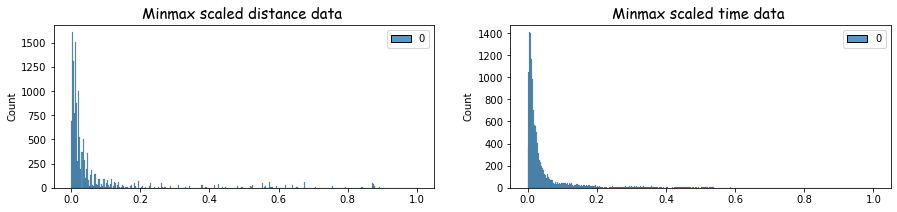

In [104]:
fig = plt.figure(figsize=(15,3))

ax = fig.add_subplot(121)
sns.histplot(data=mm_scaled[:,:1])
plt.title('Minmax scaled distance data ',fontsize=15,fontname='Comic Sans MS')


ax = fig.add_subplot(122)
sns.histplot(data=mm_scaled[:,1:])
plt.title('Minmax scaled time data ',fontsize=15,fontname='Comic Sans MS')
plt.show()

### Observation from normalization of data using minmax scaler.

-  from the distribution of the data we can infer that the data is not normally distributed 



- we can observe the data is highly right skewed and not symmetric in nature.



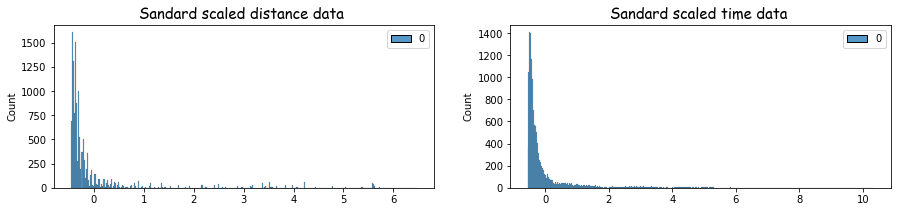

In [105]:
fig = plt.figure(figsize=(15,3))

ax = fig.add_subplot(121)
sns.histplot(data=s_scaled[:,:1])
plt.title('Sandard scaled distance data ',fontsize=15,fontname='Comic Sans MS')


ax = fig.add_subplot(122)
sns.histplot(data=s_scaled[:,1:])
plt.title('Sandard scaled time data ',fontsize=15,fontname='Comic Sans MS')
plt.show()

### Observation from normalization of data using standard scaler.

-  from the distribution of the data we can infer that the data is not normally distributed 



- we can observe the data is highly right skewed and not symmetric in nature.

In [106]:
# No mising values. 
route_df.isnull().mean()*100

trip_uuid                 0.0
source_state              0.0
destination_state         0.0
distance                  0.0
actual_time               0.0
start_scan_to_end_scan    0.0
route                     0.0
trip_creation_time        0.0
source_city               0.0
source_place              0.0
destination_city          0.0
destination_place         0.0
factor                    0.0
cutoff_factor             0.0
scan_time                 0.0
osrm_time                 0.0
datetime                  0.0
year                      0.0
month                     0.0
day                       0.0
route_type_Carting        0.0
route_type_FTL            0.0
dtype: float64

### Seperated outliers and non-outlires in two different parts.   

        

In [107]:
def remove_outlier(data):
    not_otlr, otlr = [],[]
    data_s = sorted(data)
    q1,q3 = np.percentile(data_s,[25,75])
    iqr = q1 - q3
    upper_bound = q3 - (1.5*iqr)
    lower_bound = q1 + (1.5*iqr)
    for i in range(len(data)):
        if data[i] > lower_bound and data[i] < upper_bound:
            not_otlr.append(data[i])
        else:
            otlr.append(data[i])
            
    return not_otlr,otlr


scan_no,scan_o = remove_outlier(df['start_scan_to_end_scan'])
cf_no,cf_o = remove_outlier(df['cutoff_factor'])
act_d_no,act_d_o = remove_outlier(df['actual_distance_to_destination'])
act_d_no,act_d_o = remove_outlier(df['actual_distance_to_destination'])
act_t_no,act_t_o = remove_outlier(df['actual_time'])
osrm_t_no,osrm_t_o = remove_outlier(df['osrm_time'])
osrm_d_no,osrm_d_o = remove_outlier(df['osrm_distance'])
fact_no,fact_o = remove_outlier(df['factor'])
segact_t_no,segact_t_o = remove_outlier(df['segment_actual_time'])
segorsm_t_no,segorsm_t_o = remove_outlier(df['segment_osrm_time'])
segorsm_d_no,segorsm_d_o = remove_outlier(df['segment_osrm_distance'])
segfact_no,segfact_o = remove_outlier(df['segment_factor'])
oddiff_no,oddiff_o = remove_outlier(df['od_diff'])





In [108]:
outliers = df[['start_scan_to_end_scan', 'actual_distance_to_destination',
       'actual_time', 'osrm_time', 'osrm_distance', 'factor', 'cutoff_factor',
       'segment_actual_time', 'segment_osrm_time', 'segment_osrm_distance',
       'segment_factor', 'od_diff']]



In [109]:
Non_outliers = {'start_scan_to_end_scan': scan_no[:100000], 'actual_distance_to_destination': act_d_no[:100000], 'actual_time': act_t_no[:100000], 'osrm_time': osrm_t_no[:100000], 
                'osrm_distance': osrm_d_no[:100000], 'factor': fact_no[:100000],'cutoff_factor':cf_no[:100000], 'segment_actual_time': segact_t_no[:100000],
                'segment_osrm_time': segorsm_t_no[:100000], 'segment_osrm_distance': segorsm_d_no[:100000], 'segment_factor': segfact_no[:100000], 'od_diff': oddiff_no[:100000]}
Non_outliers = pd.DataFrame(Non_outliers)

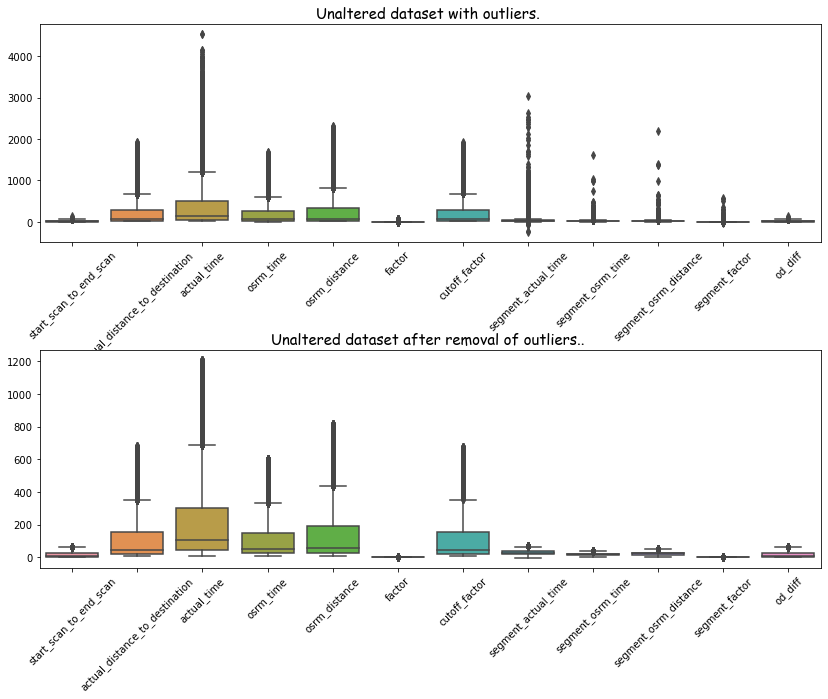

In [110]:

fig = plt.figure(figsize=(14,10))



ax = fig.add_subplot(211)

sns.boxplot(data=outliers)

plt.xticks(rotation=45)
plt.title('Unaltered dataset with outliers. ',fontsize=15,fontname='Comic Sans MS')







ax = fig.add_subplot(212)

sns.boxplot(data=Non_outliers)

plt.xticks(rotation=45)
plt.title('Unaltered dataset after removal of outliers.. ',fontsize=15,fontname='Comic Sans MS')


plt.subplots_adjust( wspace=0.3, hspace=.5)

plt.show()

### Observation from the outlier removal plot.

-   other than start_scan_to_end_scan / od_diff, factor every variables are highly affected by outliers.


-   after removal of outliers we can observe in the second plot the range of the variables are drastically decresed.

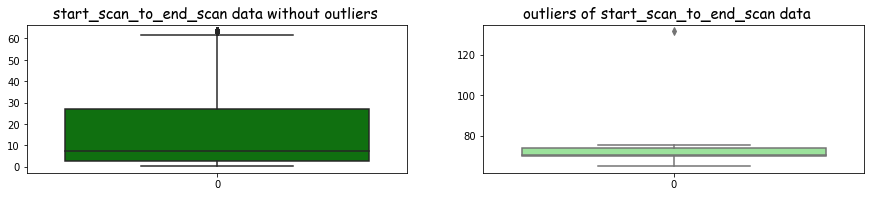

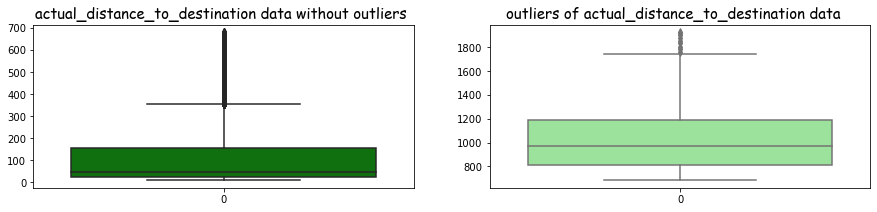

In [111]:
fig = plt.figure(figsize=(15,6))

ax = fig.add_subplot(221)
sns.boxplot(data=scan_no,color='g')
plt.title('start_scan_to_end_scan data without outliers ',fontsize=15,fontname='Comic Sans MS')


ax = fig.add_subplot(222)
sns.boxplot(data=scan_o,color='lightgreen')
plt.title('outliers of start_scan_to_end_scan data   ',fontsize=15,fontname='Comic Sans MS')

fig = plt.figure(figsize=(15,3))

ax = fig.add_subplot(121)
sns.boxplot(data=act_d_no,color='g')
plt.title('actual_distance_to_destination data without outliers ',fontsize=15,fontname='Comic Sans MS')


ax = fig.add_subplot(122)
sns.boxplot(data=act_d_o,color='lightgreen')
plt.title('outliers of actual_distance_to_destination data   ',fontsize=15,fontname='Comic Sans MS')
plt.show()


### ( example 1 )
### Observation from start_scan_to_end_scan , actual_distance_to_destination with / without outliers.


-   we can observe the mean delhivery time for non-outliers is near about 10 hrs.



-   we can observe the mean delhivery time for outliers is near about 70 hrs.



-   we can observe the mean delhivery distance for non-outliers is near about 60 km.



-   we can observe the mean delhivery distance for outliers is near about 900 km.

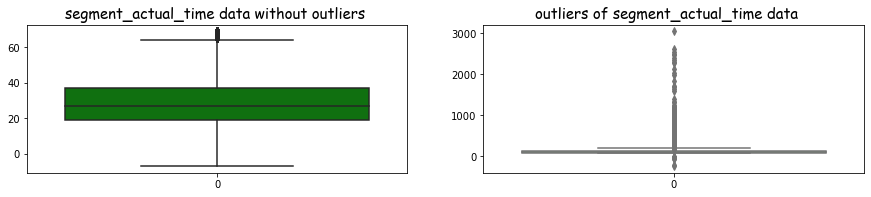

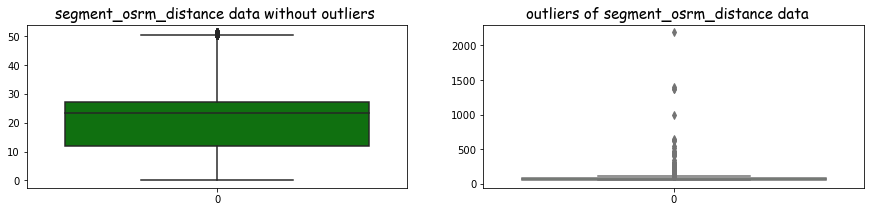

In [112]:
fig = plt.figure(figsize=(15,6))

ax = fig.add_subplot(221)
sns.boxplot(data=segact_t_no,color='g')
plt.title('segment_actual_time data without outliers ',fontsize=15,fontname='Comic Sans MS')


ax = fig.add_subplot(222)
sns.boxplot(data=segact_t_o,color='lightgreen')
plt.title('outliers of segment_actual_time data   ',fontsize=15,fontname='Comic Sans MS')

fig = plt.figure(figsize=(15,3))

ax = fig.add_subplot(121)
sns.boxplot(data=segorsm_d_no,color='g')
plt.title('segment_osrm_distance data without outliers ',fontsize=15,fontname='Comic Sans MS')


ax = fig.add_subplot(122)
sns.boxplot(data=segorsm_d_o,color='lightgreen')
plt.title('outliers of segment_osrm_distance data   ',fontsize=15,fontname='Comic Sans MS')
plt.show()


### ( example 2 )
### Observation from segment_actual_time , segment_osrm_distance with / without outliers.


-   we can observe the mean time for segment osrm delhivery for non-outliers is near about 25 hrs.



-   we can observe the mean distance for segment osrm delhivery for non-outliers is near about 25 kms.



-   we can observe the mean time for segment osrm delhivery for outliers ranges upto 3000 hrs.



-   we can observe the mean distance for segment osrm delhivery for outliers ranges upto 2000 kms.


In [113]:
avg_time = pd.DataFrame(route_df.groupby('route')['actual_time'].sum().sort_values(ascending=False)).reset_index()
avg_time1 = pd.DataFrame(round(route_df.groupby('route')['actual_time'].mean().sort_values(ascending=False),2)).reset_index()
avg_time2 = avg_time.merge(avg_time1,on='route')

avg_dist = pd.DataFrame(route_df.groupby('route')['distance'].sum().sort_values(ascending=False)).reset_index()
avg_dist1 = pd.DataFrame(round(route_df.groupby('route')['distance'].mean().sort_values(ascending=False),2)).reset_index()
avg_dist2 = avg_dist.merge(avg_dist1,on='route')
avg_dist2
route_avg = avg_dist2.merge(avg_time2,on='route')

route_avg = route_avg[['route','distance_y','actual_time_y']]
route_avg['avg_dist'] = route_avg['distance_y']
route_avg['avg_time'] = route_avg['actual_time_y']
route_avg = route_avg[['route','avg_dist','avg_time']]


route_avg.head(3)

,route,avg_dist,avg_time
0,Haryana - Haryana,335.13,6.65
1,Maharashtra - Maharashtra,136.44,3.25
2,Karnataka - Karnataka,98.82,2.29


In [114]:
x = pd.DataFrame(route_df['route'].value_counts()).reset_index()
x = x.sort_values(by='index')
ee = route_avg.sort_values(by='route')
ee['new'] = list(x['route'])
# ee

In [115]:
route_avg1 = ee.rename(columns={'new':'counts'})
route_avg1 = route_avg1[['route','avg_dist','avg_time','counts']]
top_20avg = route_avg1.sort_values(by='counts',ascending=False).head(20)

In [116]:
top_20avg['km/hr'] = top_20avg['avg_dist']/top_20avg['avg_time']
top_20avg.head(3)

,route,avg_dist,avg_time,counts,km/hr
2,Karnataka - Karnataka,98.82,2.29,1883,43.152838
1,Maharashtra - Maharashtra,136.44,3.25,1697,41.981538
9,Tamil Nadu - Tamil Nadu,77.79,1.69,971,46.029586


In [117]:
avg = top_20avg.sort_values(by='km/hr',ascending=False)


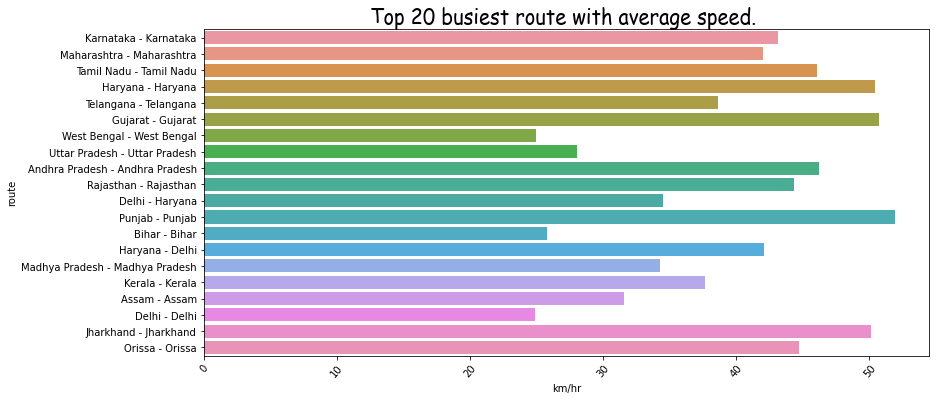

In [118]:
plt.figure(figsize=(13,6))
sns.barplot(data=top_20avg,x='km/hr',y='route')
plt.xticks(rotation=50)
plt.title('Top 20 busiest route with average speed. ',fontsize=20,fontname='Comic Sans MS')



plt.show()

### Observation from average speeds of top 20 busiest route .


-  Karnataka to Karnataka is the most travelled routes of all and it has the average speed of near about 44 km/hr. 




-    Punjab to Punjab is the fastest travelled route with an average speed of nearly 50 km/hr.



-   Haryana to Haryana, Gujarat to Gujarat, Telengana to Telengana and Jharkhand to Jharkhand also falls in the fastest travelled route with an average speed of nearly 48 km/hr.



-   Delhi to Delhi and west Bengal to West Bengal is the least fastest route with the average speed of nearly 25 km/hr.

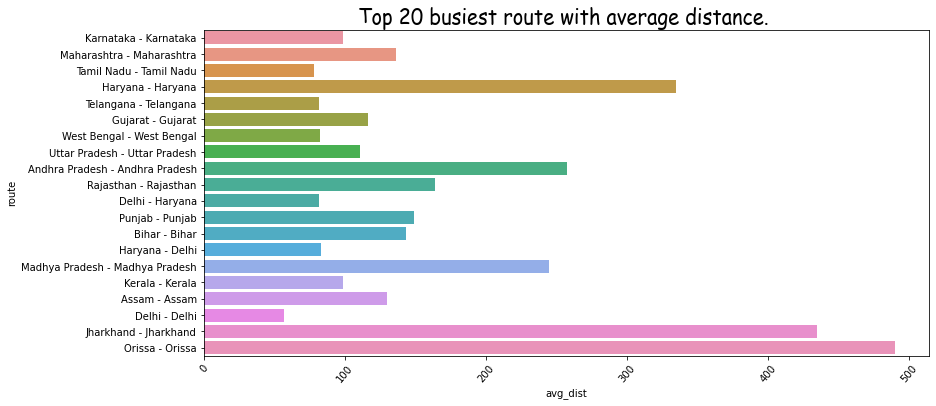

In [119]:
plt.figure(figsize=(13,6))
sns.barplot(data=top_20avg,x='avg_dist',y='route')
plt.xticks(rotation=50)
plt.title('Top 20 busiest route with average distance. ',fontsize=20,fontname='Comic Sans MS')



plt.show()

### Observation from average distance of top 20 busiest route .


-  Karnataka to Karnataka is the most travelled routes of all and it has the average distance of near about 100 kms. 




-   Odisha to Odisha is the 20th most travelled route with an average of 485 kms which is the highest of all.



-   Jharkhand to Jharkhand is the 19th most travelled route with an average of nearly 430 kms which is the 2nd highest of all.




-   Haryana to Haryana is the 4th most travelled route with an average of nearly 350 kms which is the 3nd highest of all.



-   Arunachal Pradesh to Arunachal Pradesh is the 9th most travelled route with an average of nearly 260 kms which is the 4th highest of all.



-   Madhya Pradesh to Madhya Pradesh is the 15th most travelled route with an average of nearly 250 kms which is the 5th highest of all.




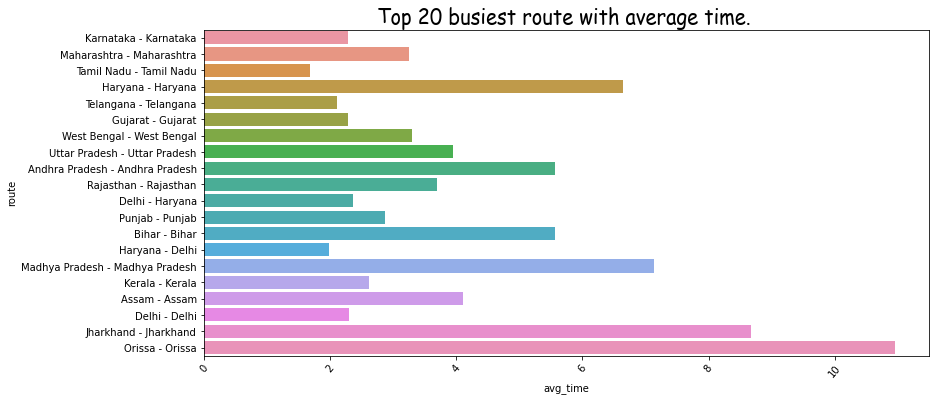

In [120]:
plt.figure(figsize=(13,6))
sns.barplot(data=top_20avg,x='avg_time',y='route')
plt.xticks(rotation=50)
plt.title('Top 20 busiest route with average time. ',fontsize=20,fontname='Comic Sans MS')



plt.show()

### Observation from average time of top 20 busiest route .


-  Karnataka to Karnataka is the most travelled routes of all and it has the average time of near about 2 hrs / travel. 




-   Odisha to Odisha is the 20th most travelled route with an average time of 10+ hrs / travel which is the highest of all.



-   Jharkhand to Jharkhand is the 19th most travelled route with an average time of nearly 8:30 hrs / travel which is the 2nd highest of all.




-   Madhya Pradesh to Madhya Pradesh is the 15th most travelled route with an average time of nearly 7 hrs / travel which is the 3rd highest of all.




-   Haryana to Haryana is the 4th most travelled route with an average time of nearly 7:40 hrs / travel which is the 4th highest of all.



-   Arunachal Pradesh to Arunachal Pradesh is the 9th most travelled route with an average time of nearly 5:45 hrs / travel which is the 5th highest of all.




-   Bihar to Bihar is the 9th most travelled route with an average time of nearly 5:30 hrs / travel which is the 6th highest of all.

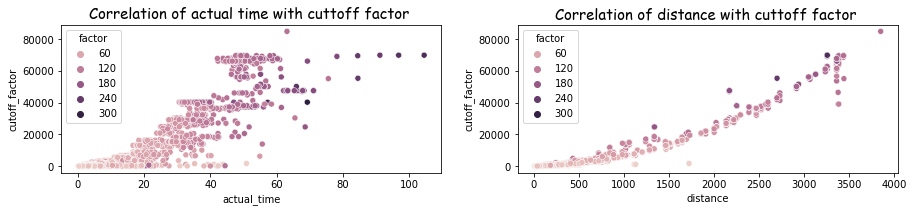

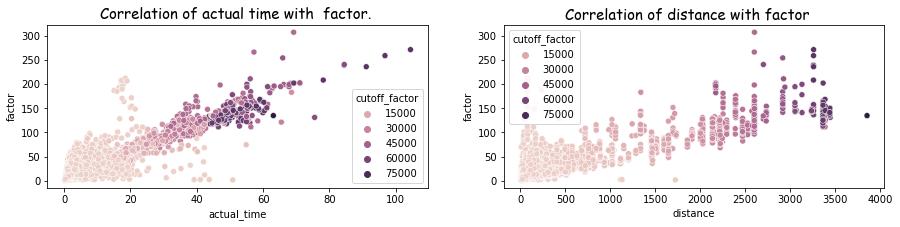

In [121]:
fig = plt.figure(figsize=(15,6))

ax = fig.add_subplot(221)
sns.scatterplot(data = route_df,x = 'actual_time',  y = 'cutoff_factor',hue='factor')
plt.title('Correlation of actual time with cuttoff factor ',fontsize=15,fontname='Comic Sans MS')


ax = fig.add_subplot(222)
sns.scatterplot(data = route_df,x = 'distance',  y = 'cutoff_factor',hue='factor')
plt.title('Correlation of distance with cuttoff factor ',fontsize=15,fontname='Comic Sans MS')

fig = plt.figure(figsize=(15,3))

ax = fig.add_subplot(121)
sns.scatterplot(data = route_df,x = 'actual_time',  y = 'factor',hue='cutoff_factor')
plt.title('Correlation of actual time with  factor. ',fontsize=15,fontname='Comic Sans MS')


ax = fig.add_subplot(122)
sns.scatterplot(data = route_df,x = 'distance',  y = 'factor',hue='cutoff_factor')
plt.title('Correlation of distance with factor   ',fontsize=15,fontname='Comic Sans MS')
plt.show()


### Observation from correlation between factor, cutoff factor with  actual time and distance.


-    From above illustration it can be infered that distance drastically increased as cutoff factor increases.



-    From above illustration it can be infered that actual time drastically increased as factor increases.



-  Distance increases with the increase of factors.

# *Busiest corridor, avg distance between them, avg time taken ( Analysis ends here)*

---------------------------------------------------------------------------------------------------------------------------------


# *Data pre-processing for forcasting starts here.*

In [122]:
route_df.head(3)

,trip_uuid,source_state,destination_state,distance,actual_time,start_scan_to_end_scan,route,trip_creation_time,source_city,source_place,destination_city,destination_place,factor,cutoff_factor,scan_time,osrm_time,datetime,year,month,day,route_type_Carting,route_type_FTL
0,trip-153671041653548748,Madhya Pradesh,Haryana,881.003772,26.03,37.65,Madhya Pradesh - Haryana,2018-09-12 00:00:16.535741,Bhopal,Trnsport,Gurgaon,Bilaspur,76.520099,8809,11.62,12.38,2018-09-12 00:00:16.535741,2018,September,Wed,0,1
1,trip-153671042288605164,Karnataka,Karnataka,93.725419,1.60,3.00,Karnataka - Karnataka,2018-09-12 00:00:22.886430,Doddablpur,ChikaDPP,Doddablpur,ChikaDPP,16.495132,234,1.40,1.13,2018-09-12 00:00:22.886430,2018,September,Wed,1,0
2,trip-153671043369099517,Haryana,Haryana,3362.306060,55.78,65.55,Haryana - Haryana,2018-09-12 00:00:33.691250,Gurgaon,Bilaspur,Gurgaon,Bilaspur,151.622912,67750,9.77,29.02,2018-09-12 00:00:33.691250,2018,September,Wed,0,1


In [123]:
try_ml = route_df[[ 'route','distance',  'actual_time', 'start_scan_to_end_scan','scan_time','osrm_time',
       'factor', 'cutoff_factor', 'datetime',
       'route_type_Carting', 'route_type_FTL']]
try_ml.head(3)

,route,distance,actual_time,start_scan_to_end_scan,scan_time,osrm_time,factor,cutoff_factor,datetime,route_type_Carting,route_type_FTL
0,Madhya Pradesh - Haryana,881.003772,26.03,37.65,11.62,12.38,76.520099,8809,2018-09-12 00:00:16.535741,0,1
1,Karnataka - Karnataka,93.725419,1.60,3.00,1.40,1.13,16.495132,234,2018-09-12 00:00:22.886430,1,0
2,Haryana - Haryana,3362.306060,55.78,65.55,9.77,29.02,151.622912,67750,2018-09-12 00:00:33.691250,0,1


In [124]:
try_ml['route'].value_counts()

Karnataka - Karnataka        1883
Maharashtra - Maharashtra    1697
Tamil Nadu - Tamil Nadu       971
Haryana - Haryana             797
Telangana - Telangana         636
                             ... 
Gujarat - Daman & Diu           1
Delhi - Assam                   1
Tamil Nadu - Kerala             1
Punjab - Karnataka              1
Pondicherry - Tamil Nadu        1
Name: route, Length: 145, dtype: int64

In [125]:
try_ml.sample(2)

,route,distance,actual_time,start_scan_to_end_scan,scan_time,osrm_time,factor,cutoff_factor,datetime,route_type_Carting,route_type_FTL
2342,Telangana - Telangana,231.318026,3.50,4.616667,1.12,1.72,12.887453,450,2018-09-15 10:10:58.195619,0,1
1930,Karnataka - Karnataka,112.477445,1.77,9.316667,7.55,3.23,29.993736,471,2018-09-14 22:08:18.179244,1,0


In [126]:
try_ml['month_no'] = try_ml['datetime'].dt.month
try_ml['day_no'] = try_ml['datetime'].dt.day
try_ml['day_of_week'] = try_ml['datetime'].dt.dayofweek
try_ml['is_weekend'] = np.where(try_ml['day_of_week'].isin([6,5]),1,0)
try_ml['week_no'] = try_ml['datetime'].dt.week
try_ml['quarter'] = try_ml['datetime'].dt.quarter
try_ml['semester'] = np.where(try_ml['quarter'].isin([1,2]),1,0)





In [127]:
try_ml[['route', 'distance', 'actual_time', 'start_scan_to_end_scan', 'factor',
       'cutoff_factor', 'route_type_Carting', 'route_type_FTL',
       'month_no', 'day_no', 'day_of_week', 'is_weekend', 'week_no', 'quarter',
       'semester']]

try_ml1 = try_ml[['route', 'distance', 'actual_time', 'start_scan_to_end_scan', 'factor',
       'cutoff_factor', 'route_type_Carting', 'route_type_FTL',
       'month_no', 'day_no', 'day_of_week', 'is_weekend', 'week_no', 'quarter',
       'semester']]

In [128]:
try_ml = try_ml[['route', 'distance', 'actual_time', 'start_scan_to_end_scan', 'factor',
       'cutoff_factor', 'route_type_Carting', 'route_type_FTL',
       'month_no', 'is_weekend', 'week_no', 'quarter']]
try_ml.head(3)

,route,distance,actual_time,start_scan_to_end_scan,factor,cutoff_factor,route_type_Carting,route_type_FTL,month_no,is_weekend,week_no,quarter
0,Madhya Pradesh - Haryana,881.003772,26.03,37.65,76.520099,8809,0,1,9,0,37,3
1,Karnataka - Karnataka,93.725419,1.60,3.00,16.495132,234,1,0,9,0,37,3
2,Haryana - Haryana,3362.306060,55.78,65.55,151.622912,67750,0,1,9,0,37,3


In [129]:
try_ml.columns

Index(['route', 'distance', 'actual_time', 'start_scan_to_end_scan', 'factor',
       'cutoff_factor', 'route_type_Carting', 'route_type_FTL', 'month_no',
       'is_weekend', 'week_no', 'quarter'],
      dtype='object')

In [130]:
route_merge1 = pd.DataFrame(try_ml.route.value_counts()).reset_index()
route_merge1 = route_merge1.rename(columns={'route':'busiest_corridor','index':'route'})

In [131]:
route_merge1.head()

,route,busiest_corridor
0,Karnataka - Karnataka,1883
1,Maharashtra - Maharashtra,1697
2,Tamil Nadu - Tamil Nadu,971
3,Haryana - Haryana,797
4,Telangana - Telangana,636


In [132]:
conditions = [
(route_merge1['busiest_corridor'] > 1500),
(route_merge1['busiest_corridor'] <= 1500) & (route_merge1['busiest_corridor'] > 1000),
(route_merge1['busiest_corridor'] <= 1000) & (route_merge1['busiest_corridor'] > 500),
(route_merge1['busiest_corridor'] <= 500) & (route_merge1['busiest_corridor'] > 100),
(route_merge1['busiest_corridor'] < 100) ]
values = ['+High','High','Medium','+Low','Low']



#cell 46
route_merge1['busiest_corridor'] = np.select(conditions,values)


In [133]:
# try_ml.head()

In [134]:
route_merge1.head()

,route,busiest_corridor
0,Karnataka - Karnataka,+High
1,Maharashtra - Maharashtra,+High
2,Tamil Nadu - Tamil Nadu,Medium
3,Haryana - Haryana,Medium
4,Telangana - Telangana,Medium


In [135]:
try_ml1 = try_ml.merge(route_merge1,on='route')

In [136]:
try_ml1.columns

Index(['route', 'distance', 'actual_time', 'start_scan_to_end_scan', 'factor',
       'cutoff_factor', 'route_type_Carting', 'route_type_FTL', 'month_no',
       'is_weekend', 'week_no', 'quarter', 'busiest_corridor'],
      dtype='object')

In [137]:
try_ml1 = try_ml1[['distance', 'actual_time', 'start_scan_to_end_scan', 'factor',
       'cutoff_factor', 'route_type_Carting', 'route_type_FTL', 'month_no',
       'is_weekend', 'week_no', 'quarter', 'busiest_corridor']]

In [138]:

forcast_df = pd.get_dummies(try_ml1,columns=['busiest_corridor'])
forcast_df = forcast_df.rename(columns={'busiest_corridor_0':'busiest_corridor_High'})

In [139]:
forcast_df.head()

,distance,actual_time,start_scan_to_end_scan,factor,cutoff_factor,route_type_Carting,route_type_FTL,month_no,is_weekend,week_no,quarter,busiest_corridor_+High,busiest_corridor_+Low,busiest_corridor_High,busiest_corridor_Low,busiest_corridor_Medium
0,881.003772,26.03,37.650000,76.520099,8809,0,1,9,0,37,3,0,0,0,1,0
1,881.347539,22.80,35.733333,81.608392,7281,0,1,9,0,37,3,0,0,0,1,0
2,881.923418,22.40,34.083333,75.657987,7301,0,1,9,1,37,3,0,0,0,1,0
3,502.127540,7.92,11.083333,19.828692,1711,0,1,9,1,37,3,0,0,0,1,0
4,882.491310,22.72,35.133333,73.827690,7302,0,1,9,1,37,3,0,0,0,1,0


**All the pre-processing, encoding, imputation has been done and above data is prepared for forcasting and further predictive analysis**

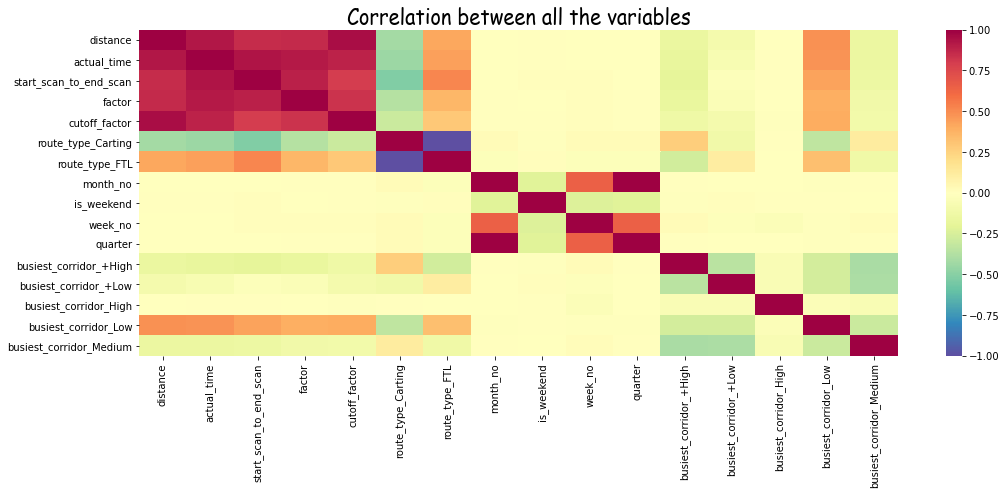

In [140]:
plt.figure(figsize=(17,6))
sns.heatmap(forcast_df.corr(),cmap='Spectral_r')
plt.title('Correlation between all the variables',fontsize=20,fontname='Comic Sans MS')
plt.show()

### Observation from above correlation plot.

-   As time increases distance increases and viceversa.


-   As factor increases distance and time increases.



-   As cutoff-factor increases distance and time increases.


-  Route type carting increase with the top busiest corridoor.


-  Route type FTL slightly increase with the lowest busiest corridoor.


-  Distance and time increases with the  lowest busiest corridoor.


# *Data pre-processing for forcasting ends here.*

---------------------------------------------------------------------------------------------------------------------------

# *Busiest routes according to route id is illustrated below.*

In [141]:
df.head(3)

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,od_end_time,start_scan_to_end_scan,is_cutoff,cutoff_factor,cutoff_timestamp,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor,source_city,source_state,source_code,source_place,destination_city,destination_state,destination_code,destination_place,od_diff
0,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,1.433333,True,9,2018-09-20 04:27:55.000000,10.435660,14.0,11.0,11.9653,1.272727,14.0,11.0,11.9653,1.272727,Anand,Gujarat,DC,VUNagar,Khambhat,Gujarat,D,MotvdDPP,1.436894
1,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,1.433333,True,18,2018-09-20 04:17:55.000000,18.936842,24.0,20.0,21.7243,1.200000,10.0,9.0,9.7590,1.111111,Anand,Gujarat,DC,VUNagar,Khambhat,Gujarat,D,MotvdDPP,1.436894
2,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,1.433333,True,27,2018-09-20 04:01:19.505586,27.637279,40.0,28.0,32.5395,1.428571,16.0,7.0,10.8152,2.285714,Anand,Gujarat,DC,VUNagar,Khambhat,Gujarat,D,MotvdDPP,1.436894


In [142]:
city_route1 = pd.DataFrame(df.groupby('route_schedule_uuid')['source_city'].unique()).reset_index()

In [143]:
city_route2 = pd.DataFrame(df.groupby('route_schedule_uuid')['destination_city'].unique()).reset_index()

In [144]:
city_route = city_route1.merge(city_route2,on='route_schedule_uuid')

In [145]:
city_route['source_city'] = city_route['source_city'].astype('str')
city_route['destination_city'] = city_route['destination_city'].astype('str')

In [146]:
city_route['source_city'] = city_route['source_city'].str.strip("[' ']").str.replace("' '","-")

In [147]:
city_route['destination_city'] = city_route['destination_city'].str.strip("[' ']").str.replace("' '","-")

In [148]:
city_route['source - destination'] = city_route['source_city'] +'-'+ city_route['destination_city']

In [149]:
city_route.head(3)

,route_schedule_uuid,source_city,destination_city,source - destination
0,thanos::sroute:0007affd-fd01-4cf0-8a4f-90419df...,Bhiwandi-Mumbai,Mumbai-Bhiwandi,Bhiwandi-Mumbai-Mumbai-Bhiwandi
1,thanos::sroute:00435307-de7f-4439-bd6a-5a2a9a3...,Bengaluru,Bengaluru,Bengaluru-Bengaluru
2,thanos::sroute:00a74fab-a3ac-44df-b83a-cbf181b...,Naugchia,Khagaria,Naugchia-Khagaria


In [150]:
citywise_busiest_route = pd.DataFrame(city_route['source - destination'].value_counts().head(21)).reset_index()

In [151]:
citywise_busiest_route = citywise_busiest_route.rename(columns={'index':'route'})

<Figure size 936x576 with 0 Axes>

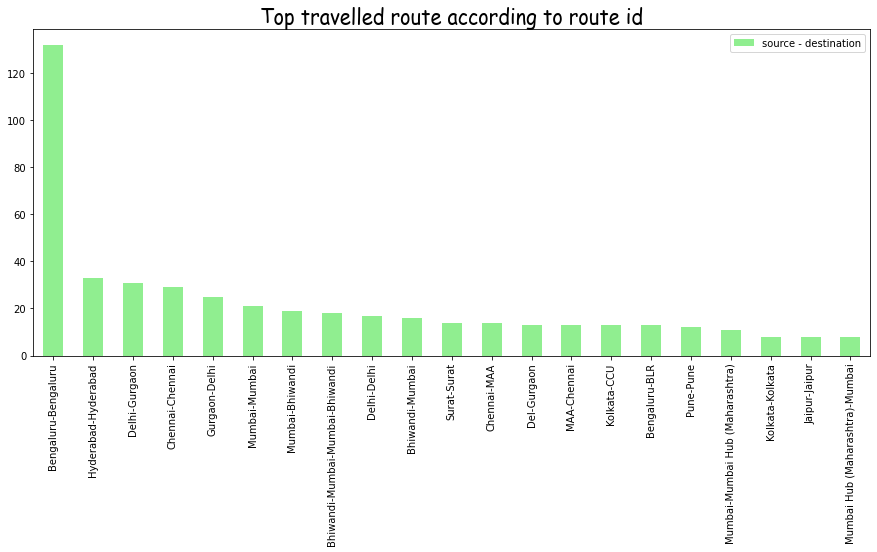

In [152]:
plt.figure(figsize = (13,8) )
citywise_busiest_route.plot(kind='bar',figsize=(15,6),color = 'lightgreen')
x1 = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]
values1 = []
for i in (citywise_busiest_route['route']):
    values1.append(i)
    
values1
plt.xticks(x1,values1,rotation=90)
plt.title('Top travelled route according to route id',fontsize=20,fontname='Comic Sans MS')

plt.show()

### Observation from above plot.

-   Bengaluru - Bengaluru is the top travelled route with the total counts of 120 trip in whole year.




-   Hyderabad - Heyderabad is the second busiest route with the total count of nar about 30 trip in whole year 2018.

In [153]:
z = 21
for i in (city_route['source - destination']):
    if len(i.split('-')) > z:
#         print(len(i.split('-')))
        print(i)


    

Guwahati-LakhimpurN-Dhemaji-Likabali-Tezpur-Pasighat-Gohpur'
 'Mangaldoi-Dhekiajuli-Bishwanath-Naharlagun-Silapathar-Nirjuli-Tezpur-Dhemaji-Silapathar-Pasighat-Mangaldoi-Itanagar'
 'Gohpur-Bishwanath-Dhekiajuli-Guwahati-LakhimpurN


### *Route that connects most cities :*
**Guwahati - LakhimpurN - Dhemaji - Likabali - Tezpur - Pasighat - Gohpur - Mangaldoi - Dhekiajuli - Bishwanath -Naharlagun - Silapathar - Nirjuli - Tezpur-Dhemaji - Silapathar - Pasighat - Mangaldoi - Itanagar - Gohpur - Bishwanath - Dhekiajuli - Guwahati - LakhimpurN**

--------------------------------------------------------------------------------------------------------------------------

In [154]:
route_df['source_warehouse'] = route_df['source_state']+ ' | '+ route_df['source_city']+' | '+ route_df['source_place']
route_df['destination_warehouse'] = route_df['destination_state']+ ' | '+ route_df['destination_city']+' | '+ route_df['destination_place']

In [155]:
busiest_source_place = pd.DataFrame(route_df['source_warehouse'].value_counts().head(21).reset_index())
busiest_dest_place = pd.DataFrame(route_df['destination_warehouse'].value_counts().head(21)).reset_index()


In [183]:
# busiest_dest_place

,index,destination_warehouse
0,Haryana | Gurgaon | Bilaspur,797
1,Karnataka | Bengaluru | Nelmngla,502
2,Maharashtra | Bhiwandi | Mankoli,441
3,Telangana | Hyderabad | Shamshbd,330
4,Karnataka | Bengaluru | Bomsndra,304
5,Haryana | Sonipat | Kundli,288
6,Karnataka | Bengaluru | KGAirprt,272
7,Punjab | Chandigarh | Mehmdpur,239
8,West Bengal | Kolkata | Dankuni,216
9,Maharashtra | Pune | Tathawde,205


In [184]:
busiest_source_place = busiest_source_place.rename(columns={'source_warehouse':'trip_counts'})
busiest_dest_place = busiest_dest_place.rename(columns={'destination_warehouse':'trip_counts'})




In [185]:
busiest_source_place = busiest_source_place.rename(columns={'index':'source_warehouse'})
busiest_dest_place = busiest_dest_place.rename(columns={'index':'destination_warehouse'})


In [187]:
# busiest_source_place.head(3)

,source_warehouse,trip_counts
0,Haryana | Gurgaon | Bilaspur,961
1,Karnataka | Bengaluru | Nelmngla,656
2,Maharashtra | Bhiwandi | Mankoli,644


In [188]:
# busiest_dest_place.head(3)

,destination_warehouse,trip_counts
0,Haryana | Gurgaon | Bilaspur,797
1,Karnataka | Bengaluru | Nelmngla,502
2,Maharashtra | Bhiwandi | Mankoli,441


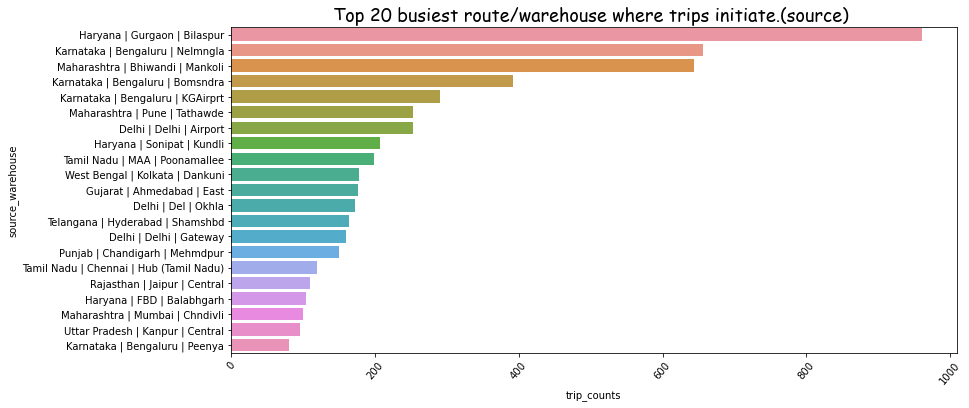

In [193]:
plt.figure(figsize=(13,6))
sns.barplot(data=busiest_source_place,x='trip_counts',y='source_warehouse')
plt.xticks(rotation=50)
plt.title('Top 20 busiest route/warehouse where trips initiate.(source) ',fontsize=18,fontname='Comic Sans MS')



plt.show()

### Observation from top 20 busiest source by route_id

-    Haryana | Gurgaon | Bilaspur seems to be top busiest source in case of trips counts where trips originated according to route_id.


-   Bilaspur of Gurgaon seems to be the busiest source warehouse of all with nearly 1000 trips in one year.



-   Nelmngla of Bengaluru  seems to be the second busiest source warehouse of all with nearly 600+ trips in one year.



-   Mankoli of Bhiwandi  seems to be the third busiest source warehouse of all with nearly 600+ trips in one year.



-   Bomsndra of Bengaluru  seems to be the fourth busiest source warehouse of all with nearly 400 trips in one year.

In [213]:
route_df['start_scan_to_end_scan'] - route_df['actual_time']

0        11.620000
1         1.400000
2         9.770000
3         9.500000
4         2.480000
           ...    
13542     2.486667
13543     0.266667
13544     2.903333
13545     0.650000
13546     3.846667
Length: 13547, dtype: float64

In [197]:
route_df['source_warehouse'].value_counts().tail(21)

Bihar | Siwan | HnmntNgr                    1
Tamil Nadu | Kalpakkam | MJRDPP             1
Bihar | Narktiganj | Central                1
Karnataka | Koppa | DC (Karnataka)          1
West Bengal | Midnapore | Talkui            1
Himachal Pradesh | Nalagarh | Central       1
Himachal Pradesh | Dalhousie | Banikhet     1
Karnataka | Aland | Nehrugnj                1
Uttar Pradesh | Mainpuri | Agraroad         1
Rajasthan | Nasirabad | Central             1
Gujarat | Gandhinagar | Kalol               1
Delhi | Delhi | Palam (Delhi)               1
Gujarat | Dhoraji | DC (Gujarat)            1
West Bengal | Islampure | Central           1
Gujarat | Ahmedabad | Busstand              1
Rajasthan | Falna | BazarDPP                1
Telangana | Bidar (Karnataka) | Datatrya    1
Punjab | Muktsar | DPC (Punjab)             1
Orissa | Jeypore | Kelasahi                 1
Andhra Pradesh | Narasnpeta | HudcoDPP      1
Gujarat | Bhuj | ClgRDDPP                   1
Name: source_warehouse, dtype: int

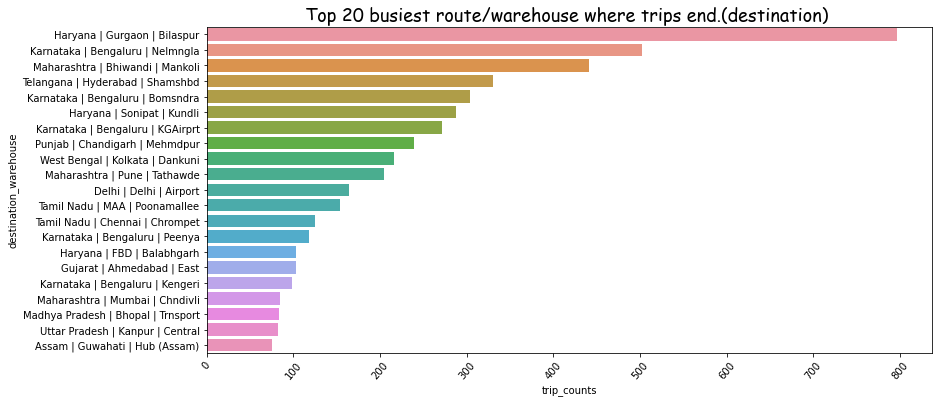

In [194]:
plt.figure(figsize=(13,6))
sns.barplot(data=busiest_dest_place,x='trip_counts',y='destination_warehouse')
plt.xticks(rotation=50)
plt.title('Top 20 busiest route/warehouse where trips end.(destination) ',fontsize=18,fontname='Comic Sans MS')



plt.show()

### Observation from top 20 busiest destination by route_id

-    Haryana | Gurgaon | Bilaspur seems to be top busiest destination in case of trips counts where trips originated, according to route_id.


-   Bilaspur of Gurgaon seems to be the busiest destination warehouse of all with nearly 800 trips in one year.



-   Nelmngla of Bengaluru  seems to be the second busiest destination warehouse of all with nearly 500+ trips in one year.



-   Mankoli of Bhiwandi  seems to be the third busiest destination warehouse of all with nearly 450+ trips in one year.



-   Shamshbd of Hyderabad   seems to be the fourth busiest destination warehouse of all with nearly 300+ trips in one year.

# ----------------------------------------------------- End---------------------------------------------

# Insights

### Observation from top 20 busiest destination by route_id



-    Haryana | Gurgaon | Bilaspur seems to be top busiest destination in case of trips counts where trips originated, according to route_id.


-   Bilaspur of Gurgaon seems to be the busiest destination warehouse of all with nearly 800 trips in one year.



-   Nelmngla of Bengaluru  seems to be the second busiest destination warehouse of all with nearly 500+ trips in one year.



-   Mankoli of Bhiwandi  seems to be the third busiest destination warehouse of all with nearly 450+ trips in one year.



-   Shamshbd of Hyderabad   seems to be the fourth busiest destination warehouse of all with nearly 300+ trips in one year.



- routes that connect most of the cities : Guwahati - LakhimpurN - Dhemaji - Likabali - Tezpur - Pasighat - Gohpur - Mangaldoi - Dhekiajuli - Bishwanath -Naharlagun - Silapathar - Nirjuli - Tezpur-Dhemaji - Silapathar - Pasighat - Mangaldoi - Itanagar - Gohpur - Bishwanath - Dhekiajuli - Guwahati - LakhimpurN




### Observation from top 20 busiest source by route_id




-    Haryana | Gurgaon | Bilaspur seems to be top busiest source in case of trips counts where trips originated according to route_id.




-   Bilaspur of Gurgaon seems to be the busiest source warehouse of all with nearly 1000 trips in one year.



-   Nelmngla of Bengaluru  seems to be the second busiest source warehouse of all with nearly 600+ trips in one year.



-   Mankoli of Bhiwandi  seems to be the third busiest source warehouse of all with nearly 600+ trips in one year.



-   Bomsndra of Bengaluru  seems to be the fourth busiest source warehouse of all with nearly 400 trips in one year.



### Observation from above correlation (heatmap plot).



-   As time increases distance increases and viceversa.


-   As factor increases distance and time increases.



-   As cutoff-factor increases distance and time increases.


-  Route type carting increase with the top busiest corridoor.


-  Route type FTL slightly increase with the lowest busiest corridoor.


-  Distance and time increases with the  lowest busiest corridoor. 



### Observation from correlation between factor, cutoff factor with  actual time and distance.


-    From above illustration it can be infered that distance drastically increased as cutoff factor increases.



-    From above illustration it can be infered that actual time drastically increased as factor increases.



-  Distance increases with the increase of factors.



### Observation from average time of top 20 busiest route .



-  Karnataka to Karnataka is the most travelled routes of all and it has the average time of near about 2 hrs / travel. 




-   Odisha to Odisha is the 20th most travelled route with an average time of 10+ hrs / travel which is the highest of all.



-   Jharkhand to Jharkhand is the 19th most travelled route with an average time of nearly 8:30 hrs / travel which is the 2nd highest of all.




-   Madhya Pradesh to Madhya Pradesh is the 15th most travelled route with an average time of nearly 7 hrs / travel which is the 3rd highest of all.




-   Haryana to Haryana is the 4th most travelled route with an average time of nearly 7:40 hrs / travel which is the 4th highest of all.



-   Arunachal Pradesh to Arunachal Pradesh is the 9th most travelled route with an average time of nearly 5:45 hrs / travel which is the 5th highest of all.




-   Bihar to Bihar is the 9th most travelled route with an average time of nearly 5:30 hrs / travel which is the 6th highest of all.



### Observation from average distance of top 20 busiest route .


-  Karnataka to Karnataka is the most travelled routes of all and it has the average distance of near about 100 kms. 




-   Odisha to Odisha is the 20th most travelled route with an average of 485 kms which is the highest of all.



-   Jharkhand to Jharkhand is the 19th most travelled route with an average of nearly 430 kms which is the 2nd highest of all.




-   Haryana to Haryana is the 4th most travelled route with an average of nearly 350 kms which is the 3nd highest of all.



-   Arunachal Pradesh to Arunachal Pradesh is the 9th most travelled route with an average of nearly 260 kms which is the 4th highest of all.



-   Madhya Pradesh to Madhya Pradesh is the 15th most travelled route with an average of nearly 250 kms which is the 5th highest of all.



### Observation from average speed of top 20 busiest route .


-  Karnataka to Karnataka is the most travelled routes of all and it has the average speed of near about 44 km/hr. 




-    Punjab to Punjab is the fastest travelled route with an average speed of nearly 50 km/hr.



-   Haryana to Haryana, Gujarat to Gujarat, Telengana to Telengana and Jharkhand to Jharkhand also falls in the fastest travelled route with an average speed of nearly 48 km/hr.



-   Delhi to Delhi and west Bengal to West Bengal is the least fastest route with the average speed of nearly 25 km/hr.



### Observations from outlier detection part.




-   we can observe the mean time for segment osrm delhivery for non-outliers is near about 25 hrs.



-   we can observe the mean distance for segment osrm delhivery for non-outliers is near about 25 kms.



-   we can observe the mean time for segment osrm delhivery for outliers ranges upto 3000 hrs.



-   we can observe the mean distance for segment osrm delhivery for outliers ranges upto 2000 kms.



-   we can observe the mean delhivery time for non-outliers is near about 10 hrs.



-   we can observe the mean delhivery time for outliers is near about 70 hrs.



-   we can observe the mean delhivery distance for non-outliers is near about 60 km.



-   we can observe the mean delhivery distance for outliers is near about 900 km.




-   other than start_scan_to_end_scan / od_diff, factor every variables are highly affected by outliers.


-   after removal of outliers we can observe in the second plot the range of the variables are drastically decresed.

### Observation from normalization of data using standard scaler and minmax scaler.


-  from the distribution of the data we can infer that the data is not normally distributed 



- we can observe the data is highly right skewed and not symmetric in nature.



-  from the distribution of the data we can infer that the data is not normally distributed 



- we can observe the data is highly right skewed and not symmetric in nature.

### Observation from hypothesis testing.


-  **CONCLUSION**  : As p value > alpha **we failed to reject the null hypothesis** ie start_scan_to_end_scan = od_diff.



-   **CONCLUSION** : As p value < alpha **we failed to accept null hypothesis** ie actual_time != osrm_time.


-   **CONCLUSION**: As p value > alpha **we failed to reject the null hypothesis** ie actual_time = segment_actual_time.


-   **CONCLUSION** : As p value < alpha **we failed to accept the null hypothesis** ie osrm_distance != segment_osrm_distance.






-   **CONCLUSION**:As p value < alpha **we failed to accept the null hypothesis** ie osrm_distance != segment_osrm_distance.

# Recommendations


-  Delhivery can optimize in their scanning time as it takes much longer in scanning.




-  As major states like Rajhasthan, Bihar dont fall in top 20 trip counts, so delhivery can increase conectivity in the sub-parts of these states.




-  As per analysis, It is recommended to use Carting (small vehicles) for delivery with in the city in order to reduce the delivery time, and Heavy trucks for long distance trips or heavy load. based on this , we can optimize the delivery time as well as increase the revenue as per requirements.



- As Haryana | Gurgaon | Bilaspur is the busiest place for all delhiveries, warehouse can be optimised for time optimization.